# Thesis workbook - Gabor Pocs, 2024


In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data import

In [218]:
path = r"C:\Users\PocsG\Desktop\ELTE_POSTGRAD\Thesis"
df = pd.read_csv(path + "/input_data.csv", sep=",", decimal=".")

In [219]:
df.drop(columns=["OBS_NUMBER"], inplace=True)

### Missing variables

In [220]:
for i in df.columns:
    print(i + ": " + str(df[df[i]!=df[i]].shape[0]))

DEFAULT_FLAG: 0
LAKOK_SZAM: 0
KISKORU_ELTARTOTT_SZAM: 0
HAVI_NETTO_FT: 0
MUNKA_EV: 0
EMBER_EV: 0
EMBER_NEM: 0
CSALADI_ALL: 0
VEGZETTSEG: 0


There is no missing varible, but it does not mean that the preprocessing is done

###  Inspection of salary varible

There is no missing values, however, I know that some data preprocessing was made on this dataset. 

I make two different flags that indicate if the client's salary value is missing or lower than a certain level.

In [221]:
for i in range(0, 100, 5):
    print("Nr of cleints with lower salary than {} HUF: {}".format(str(i), df[df["HAVI_NETTO_FT"] < int(i)].shape[0]))

Nr of cleints with lower salary than 0 HUF: 0
Nr of cleints with lower salary than 5 HUF: 712
Nr of cleints with lower salary than 10 HUF: 712
Nr of cleints with lower salary than 15 HUF: 712
Nr of cleints with lower salary than 20 HUF: 712
Nr of cleints with lower salary than 25 HUF: 712
Nr of cleints with lower salary than 30 HUF: 712
Nr of cleints with lower salary than 35 HUF: 712
Nr of cleints with lower salary than 40 HUF: 712
Nr of cleints with lower salary than 45 HUF: 712
Nr of cleints with lower salary than 50 HUF: 712
Nr of cleints with lower salary than 55 HUF: 712
Nr of cleints with lower salary than 60 HUF: 712
Nr of cleints with lower salary than 65 HUF: 712
Nr of cleints with lower salary than 70 HUF: 712
Nr of cleints with lower salary than 75 HUF: 712
Nr of cleints with lower salary than 80 HUF: 712
Nr of cleints with lower salary than 85 HUF: 712
Nr of cleints with lower salary than 90 HUF: 712
Nr of cleints with lower salary than 95 HUF: 712


In [222]:
df["ZERO_INCOME"] = np.where(df["HAVI_NETTO_FT"] < 5, 1, 0)
df["MISSING_INCOME"] = np.where(df["HAVI_NETTO_FT"]==statistics.median(df["HAVI_NETTO_FT"]), 1, 0)

I replace the imputed salary value with a bit more sophisticated way

In [223]:
df[df["HAVI_NETTO_FT"]==statistics.median(df["HAVI_NETTO_FT"])]

DEFAULT_FLAG  LAKOK_SZAM  KISKORU_ELTARTOTT_SZAM  HAVI_NETTO_FT  \
33                0           3                       0         245805   
40                0           4                       2         245805   
51                0           4                       2         245805   
73                0           4                       2         245805   
108               0           2                       0         245805   
...             ...         ...                     ...            ...   
21866             0           3                       1         245805   
21891             0           2                       0         245805   
21915             0           4                       2         245805   
21925             0           5                       3         245805   
21947             0           2                       0         245805   

       MUNKA_EV  EMBER_EV  EMBER_NEM  CSALADI_ALL  VEGZETTSEG  ZERO_INCOME  \
33           10        56          1            1           2            0   
40           10        47          1            1           2            0   
51           10        20          2            4           2            0   
73           10        37          1            1           2            0   
108          10        49          2            5           2            0   
...         ...       ...        ...          ...         ...          ...   
21866        10        54          1            5           2            0   
21891        10        54          1            1           2            0   
21915        10        39          1            1           2            0   
21925        10        42          2            3           2            0   
21947        10        71          1            1           2            0   

       MISSING_INCOME  
33                  1  
40                  1  
51                  1  
73                  1  
108                 1  
...               ...  
21866               1  
21891               1  
21915               1  
21925               1  
21947               1  

[617 rows x 11 columns]

In [224]:
assist = pd.DataFrame(df[(df["MISSING_INCOME"]==0) & (df["ZERO_INCOME"]==0)].groupby(["VEGZETTSEG"])[["HAVI_NETTO_FT"]].median()).reset_index()

In [225]:
df = df.merge(assist, on="VEGZETTSEG", how="left", suffixes=["", "_imputed"])

In [226]:
df["HAVI_NETTO_FT"] = np.where(df["MISSING_INCOME"]==1, df["HAVI_NETTO_FT_imputed"], df["HAVI_NETTO_FT"])

In [227]:
df.drop(columns=["HAVI_NETTO_FT_imputed"], inplace=True)

### Inspection of working years and client's age variables

The data contains two variables about the client's age and his working years. Due to some issues, these columns inherited some discrepances. The working years variable must be lower than the client's age. Secondly, the difference between these numbers must be lower than a certain level. Even earlier, sincer the second word war, to completing elementary school was a must. Therefore, the difference between the age and working year of a given person could not be lower than 14. 

In [228]:
df["SZULETESI_DATUM"] = 2023-df["EMBER_EV"]

At those records where the difference between the age of the client and the working years samller than 16 I replace the working years with a more probable value. I take into the account the age of the client and the compulsory education limit.

<AxesSubplot: ylabel='Count'>

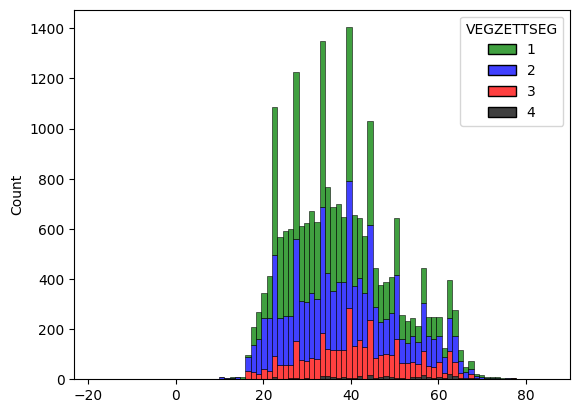

In [229]:
sns.histplot(data=df, x=(df["EMBER_EV"]-df["MUNKA_EV"]), hue="VEGZETTSEG", palette=['green', 'blue', 'red', 'black'],multiple="stack")

Correcting the median imputation 

In [230]:
df[df["MUNKA_EV"]==df["MUNKA_EV"].median()]

DEFAULT_FLAG  LAKOK_SZAM  KISKORU_ELTARTOTT_SZAM  HAVI_NETTO_FT  \
5                 0           4                       1            0.0   
14                0           2                       0       291517.0   
27                0           1                       0            0.0   
33                0           3                       0       217483.0   
40                0           4                       2       217483.0   
...             ...         ...                     ...            ...   
21931             0           2                       0       218692.0   
21932             0           2                       0            0.0   
21933             0           2                       0            0.0   
21944             0           4                       2       221650.0   
21947             0           2                       0       217483.0   

       MUNKA_EV  EMBER_EV  EMBER_NEM  CSALADI_ALL  VEGZETTSEG  ZERO_INCOME  \
5            10        29          2            1           1            1   
14           10        63          2            1           1            0   
27           10        73          2            3           2            1   
33           10        56          1            1           2            0   
40           10        47          1            1           2            0   
...         ...       ...        ...          ...         ...          ...   
21931        10        49          2            1           1            0   
21932        10        73          1            1           3            1   
21933        10        64          1            1           3            1   
21944        10        49          2            3           2            0   
21947        10        71          1            1           2            0   

       MISSING_INCOME  SZULETESI_DATUM  
5                   0             1994  
14                  0             1960  
27                  0             1950  
33                  1             1967  
40                  1             1976  
...               ...              ...  
21931               0             1974  
21932               0             1950  
21933               0             1959  
21944               0             1974  
21947               1             1952  

[2012 rows x 12 columns]

<AxesSubplot: xlabel='EMBER_EV', ylabel='MUNKA_EV'>

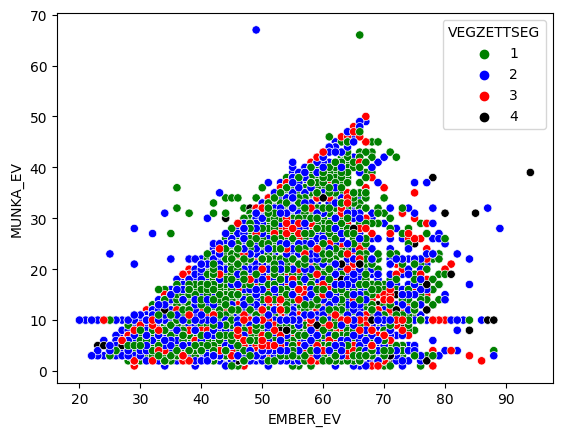

In [231]:
sns.scatterplot(data=df, x="EMBER_EV", y="MUNKA_EV", hue="VEGZETTSEG",palette=['green', 'blue', 'red', 'black'])

I replace the median value, which can be seen on the graph above, with the difference of the age of the client and the upper level of compulsory education which I consider 14 years.

In [232]:
df["MISSING_WORKING_YEARS"] = np.where(df["MUNKA_EV"]==df["MUNKA_EV"].median(), 1, 0) 

In [233]:
 df["MUNKA_EV"] = np.where(df["MISSING_WORKING_YEARS"]==1, df["EMBER_EV"]-14, df["MUNKA_EV"])

Check the minimal difference between age and working years

In [234]:
df[((df["EMBER_EV"]-df["MUNKA_EV"]) < 14)]

DEFAULT_FLAG  LAKOK_SZAM  KISKORU_ELTARTOTT_SZAM  HAVI_NETTO_FT  \
5682              0           2                       0       244077.0   
6339              0           4                       2       299250.0   
6395              0           1                       0       473653.0   
8759              0           2                       0       189525.0   
9759              0           3                       0       213332.0   
10379             0           4                       2       172500.0   
10799             0           2                       1       594500.0   
12015             0           2                       0       222427.0   
12908             0           3                       1       494491.0   
14360             0           4                       2       133132.0   
14504             0           6                       3        70047.0   
16835             0           3                       1       160176.0   
17085             0           2                       0       129675.0   
17312             0           2                       0       271320.0   
17596             0           2                       0       320861.0   
19098             0           4                       2       399800.0   
19762             0           3                       1       359543.0   
19948             0           5                       3       327761.0   
20034             0           4                       2       224105.0   
21576             0           4                       2       117410.0   

       MUNKA_EV  EMBER_EV  EMBER_NEM  CSALADI_ALL  VEGZETTSEG  ZERO_INCOME  \
5682         22        35          1            1           2            0   
6339         32        36          1            1           1            0   
6395         27        32          1            4           2            0   
8759         66        66          1            1           1            0   
9759         23        25          1            1           2            0   
10379        33        42          2            1           1            0   
10799        34        44          2            4           1            0   
12015        21        29          2            4           2            0   
12908        34        45          1            1           1            0   
14360        31        34          1            1           2            0   
14504        30        41          2            1           2            0   
16835        31        44          1            1           1            0   
17085        27        35          2            1           1            0   
17312        36        36          2            1           1            0   
17596        28        29          2            4           2            0   
19098        31        42          2            1           1            0   
19762        31        38          1            1           1            0   
19948        67        49          1            1           2            0   
20034        34        46          1            1           1            0   
21576        35        43          1            1           2            0   

       MISSING_INCOME  SZULETESI_DATUM  MISSING_WORKING_YEARS  
5682                0             1988                      0  
6339                0             1987                      0  
6395                0             1991                      0  
8759                0             1957                      0  
9759                0             1998                      0  
10379               0             1981                      0  
10799               0             1979                      0  
12015               0             1994                      0  
12908               0             1978                      0  
14360               0             1989                      0  
14504               0             1982                      0  
16835               0             1979       

I replace these datapoints too with the above applied technique because these are inevitable worng. 

In [235]:
df["WRONG_WORKING_YEARS"] = np.where((df["EMBER_EV"]-df["MUNKA_EV"]) < 14,1,0)

In [236]:
df["MUNKA_EV"] = np.where(df["WRONG_WORKING_YEARS"]==1, df["EMBER_EV"]-14, df["MUNKA_EV"])

<AxesSubplot: xlabel='EMBER_EV', ylabel='MUNKA_EV'>

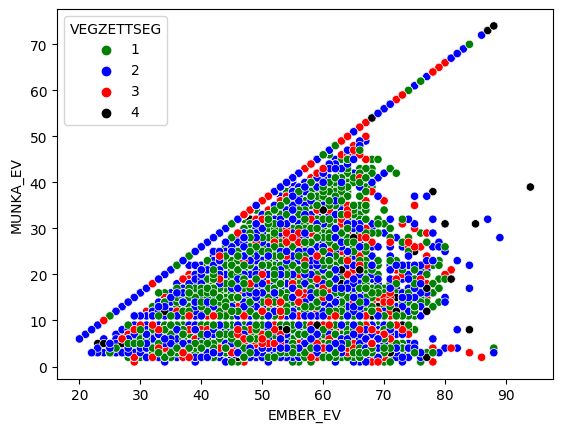

In [237]:
sns.scatterplot(data=df, x="EMBER_EV", y="MUNKA_EV", hue="VEGZETTSEG",palette=['green', 'blue', 'red', 'black'])

A brief detour

In [238]:
import statsmodels.api as sm

In [239]:
df_test = df[['HAVI_NETTO_FT', 'MUNKA_EV', 'EMBER_NEM', 'VEGZETTSEG']].copy()

In [240]:
x = df_test[['MUNKA_EV', 'EMBER_NEM', 'VEGZETTSEG']]
y = df_test["HAVI_NETTO_FT"]

x = sm.add_constant(x)

In [241]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
x_enc = ohe.fit_transform(x[['EMBER_NEM', 'VEGZETTSEG']])

In [242]:
x = pd.concat([x[["const", "MUNKA_EV"]], x_enc], axis = 1)

In [243]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x["MUNKA_EV"] = scaler.fit_transform(x[["MUNKA_EV"]])

In [244]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          HAVI_NETTO_FT   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     826.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:40:54   Log-Likelihood:            -2.9854e+05
No. Observations:               21949   AIC:                         5.971e+05
Df Residuals:                   21943   BIC:                         5.971e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.555e+17   2.59e+17     -0.601   

There is no significant relationship between the salary and other variables

### Outlier detection

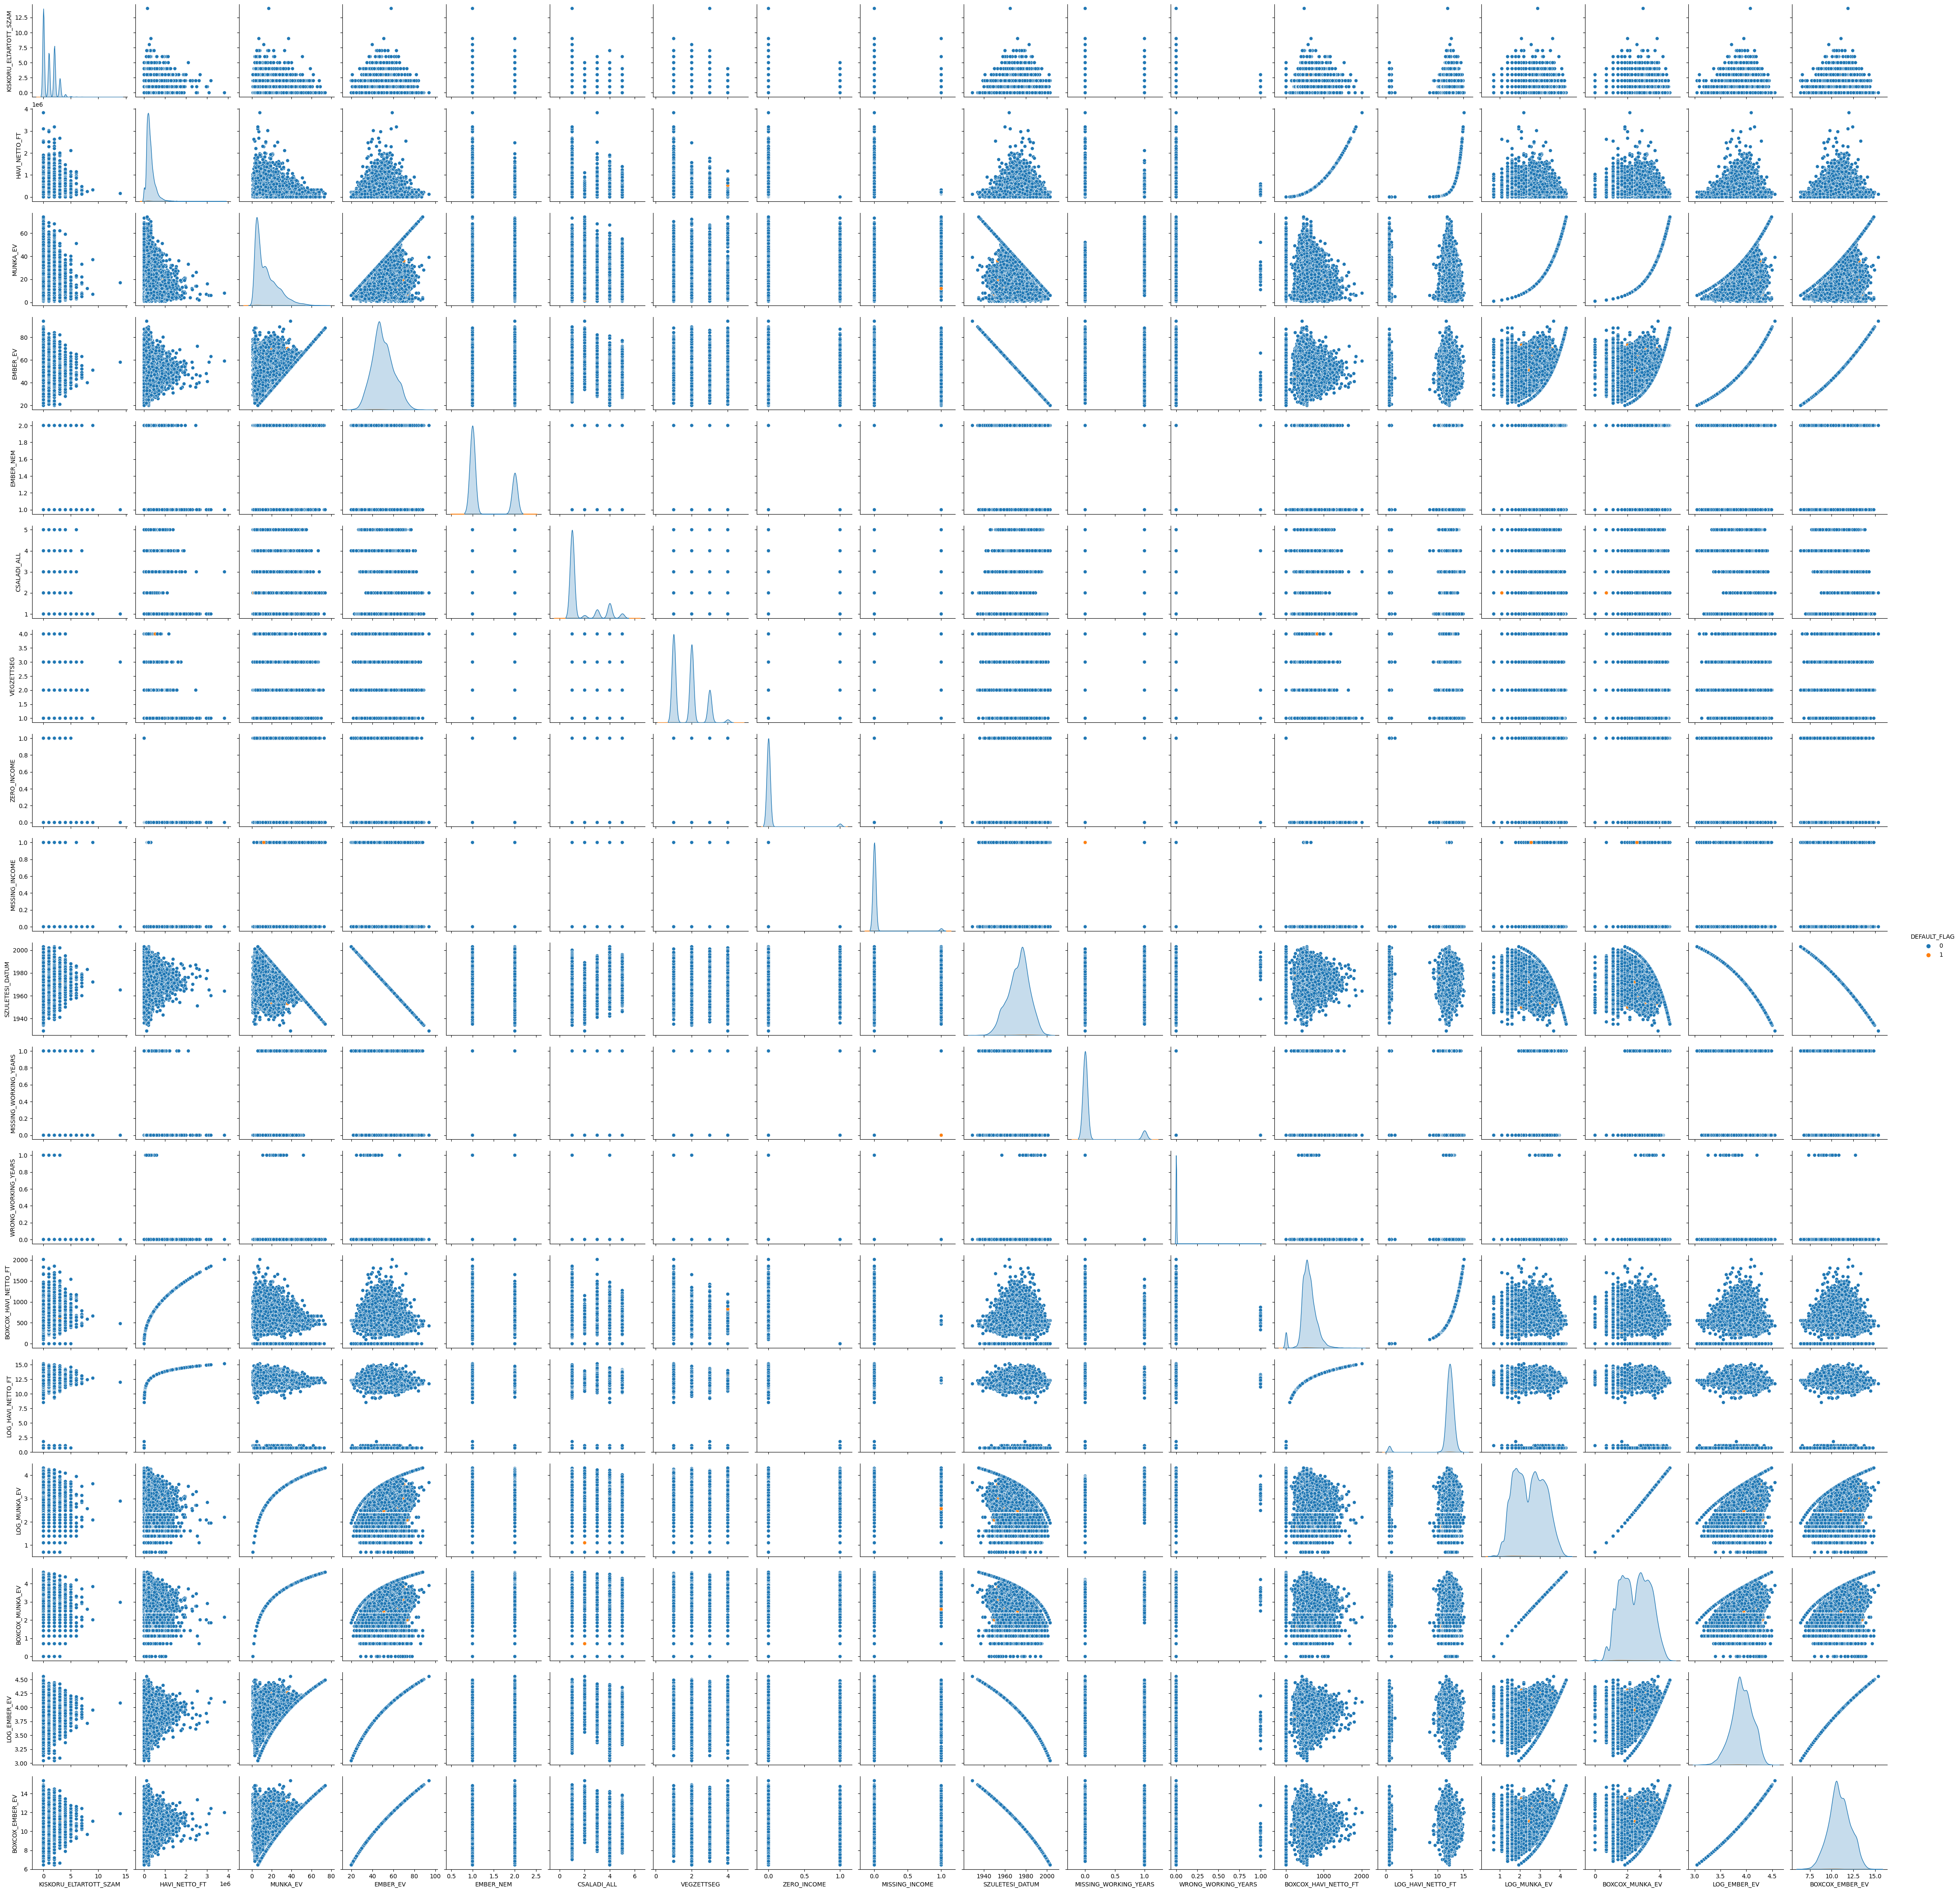

In [290]:
sns.pairplot(df, hue='DEFAULT_FLAG')

I noticed an outlier value in "LAKOK_SZAM" variable. The 41 means that there are 41 people in the same household which is unlikely.

In [246]:
df[df["LAKOK_SZAM"]==41]

DEFAULT_FLAG  LAKOK_SZAM  KISKORU_ELTARTOTT_SZAM  HAVI_NETTO_FT  \
20065             0          41                       1       191321.0   

       MUNKA_EV  EMBER_EV  EMBER_NEM  CSALADI_ALL  VEGZETTSEG  ZERO_INCOME  \
20065         8        54          1            1           2            0   

       MISSING_INCOME  SZULETESI_DATUM  MISSING_WORKING_YEARS  \
20065               0             1969                      0   

       WRONG_WORKING_YEARS  
20065                    0

In [247]:
df["VEGZETTSEG"].unique()

array([1, 2, 4, 3], dtype=int64)

In [248]:
avg_enh_nr = df[(df["VEGZETTSEG"]==2)&(df["KISKORU_ELTARTOTT_SZAM"]==1)]["LAKOK_SZAM"].mean().round()
df.at[df[df["LAKOK_SZAM"]==41].index[0], "LAKOK_SZAM"] = avg_enh_nr

### Test variables for normality
The logistic regression does not requre normally distributed variables but the visulaization is always useful.

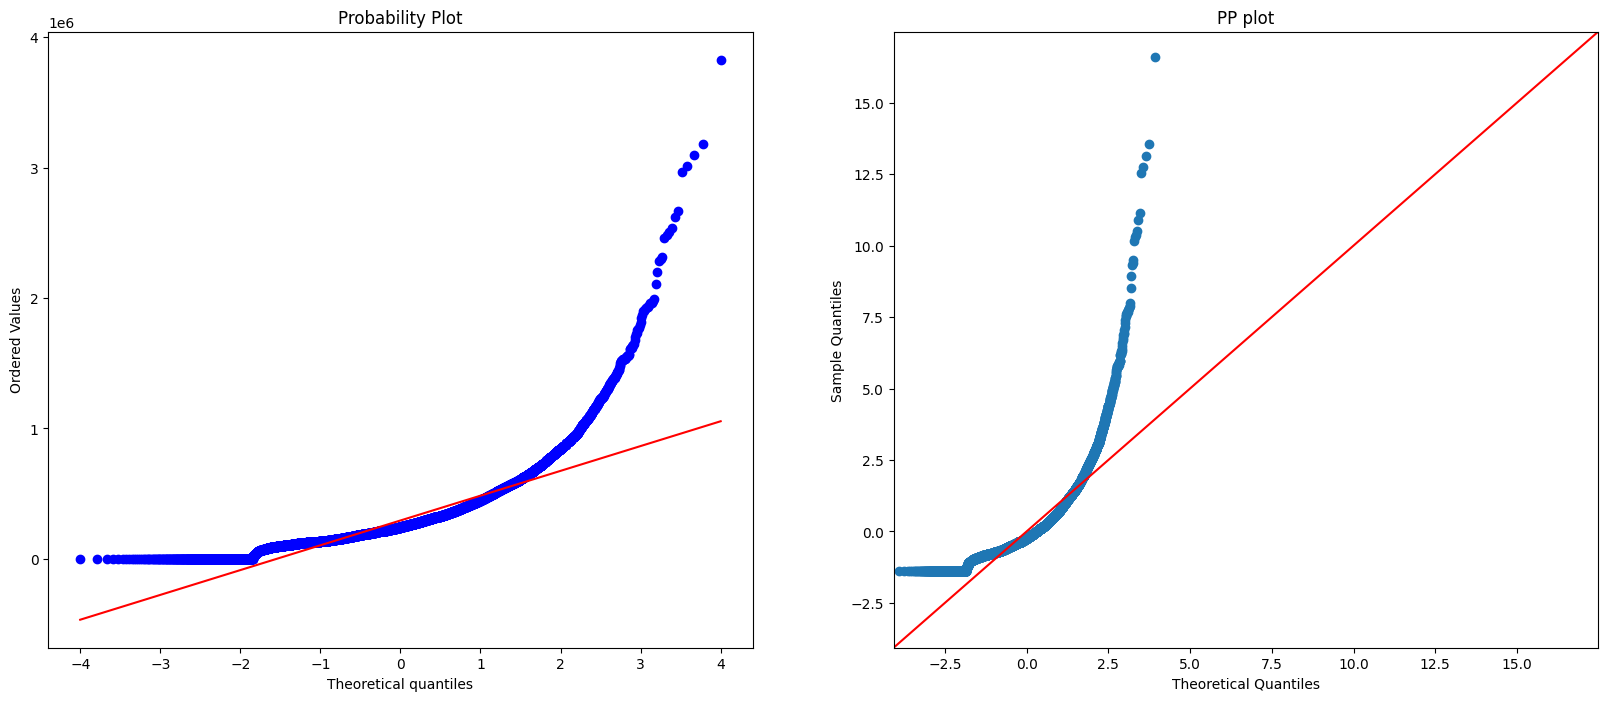

In [249]:
import scipy.stats as stats

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].set_title('PP plot')
ax[1].set_title('PP plot')
# QQ plot
sm.qqplot(df["HAVI_NETTO_FT"], stats.norm, fit=True, line='45', ax=ax[1])
# PP plot
stats.probplot(df["HAVI_NETTO_FT"], plot=ax[0])
plt.show()

In [250]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['HAVI_NETTO_FT'].skew())

Skewness of the SalesPrice is 2.9791047045301027


In [251]:
from scipy import stats
df['BOXCOX_HAVI_NETTO_FT'], _ = stats.boxcox(df['HAVI_NETTO_FT']+1)

C:\Users\PocsG\AppData\Local\Temp\ipykernel_5652\2926815887.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)


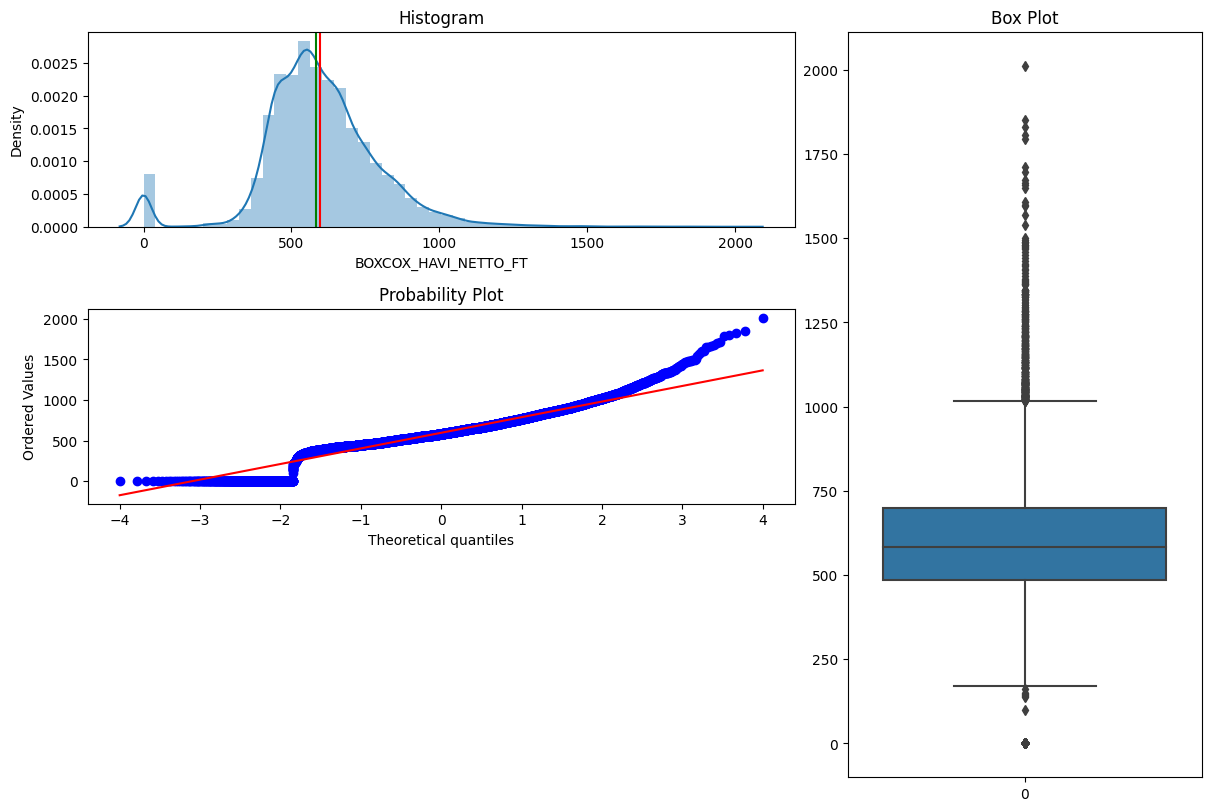

In [252]:
import matplotlib.gridspec as gridspec 

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'BOXCOX_HAVI_NETTO_FT')

C:\Users\PocsG\AppData\Local\Temp\ipykernel_5652\2926815887.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)


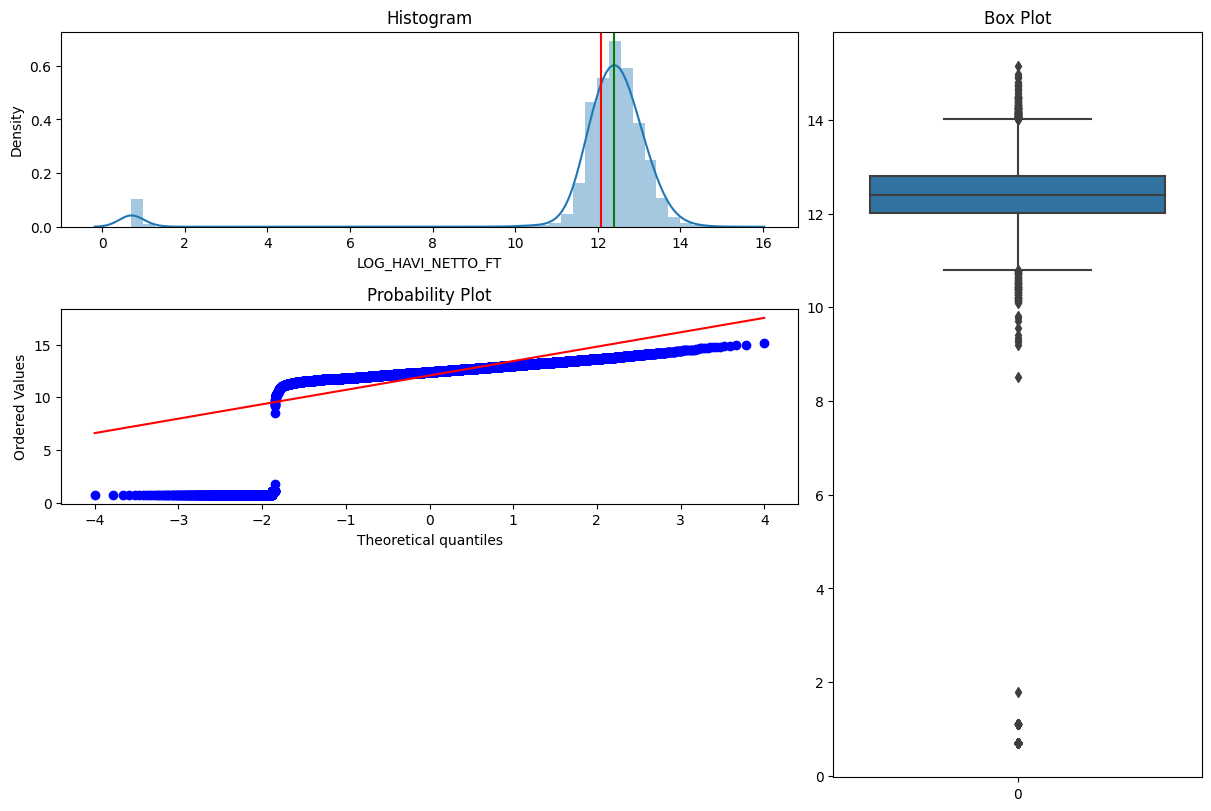

In [253]:
df['LOG_HAVI_NETTO_FT'] = np.log1p(df["HAVI_NETTO_FT"]+1)
three_chart_plot(df, 'LOG_HAVI_NETTO_FT')

In [254]:
stats.kstest(df["HAVI_NETTO_FT"], stats.norm.cdf)

KstestResult(statistic=0.9675750534381068, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)

In [255]:
stats.kstest(df[df["HAVI_NETTO_FT"]>0]["LOG_HAVI_NETTO_FT"], stats.norm.cdf)

KstestResult(statistic=0.9974168701859853, pvalue=0.0, statistic_location=8.501063809486354, statistic_sign=-1)

In [256]:
stats.kstest(df[df["HAVI_NETTO_FT"]>0]["BOXCOX_HAVI_NETTO_FT"], stats.norm.cdf)

KstestResult(statistic=0.9974168701859853, pvalue=0.0, statistic_location=99.10928015511142, statistic_sign=-1)

After log and Box-Cox tranformation the p-value is lower than our threshold of 0.05, so we reject the null hypothesis in favor of the default “two-sided” alternative: the salary data are not distributed according to the standard normal.

#### Working years variable

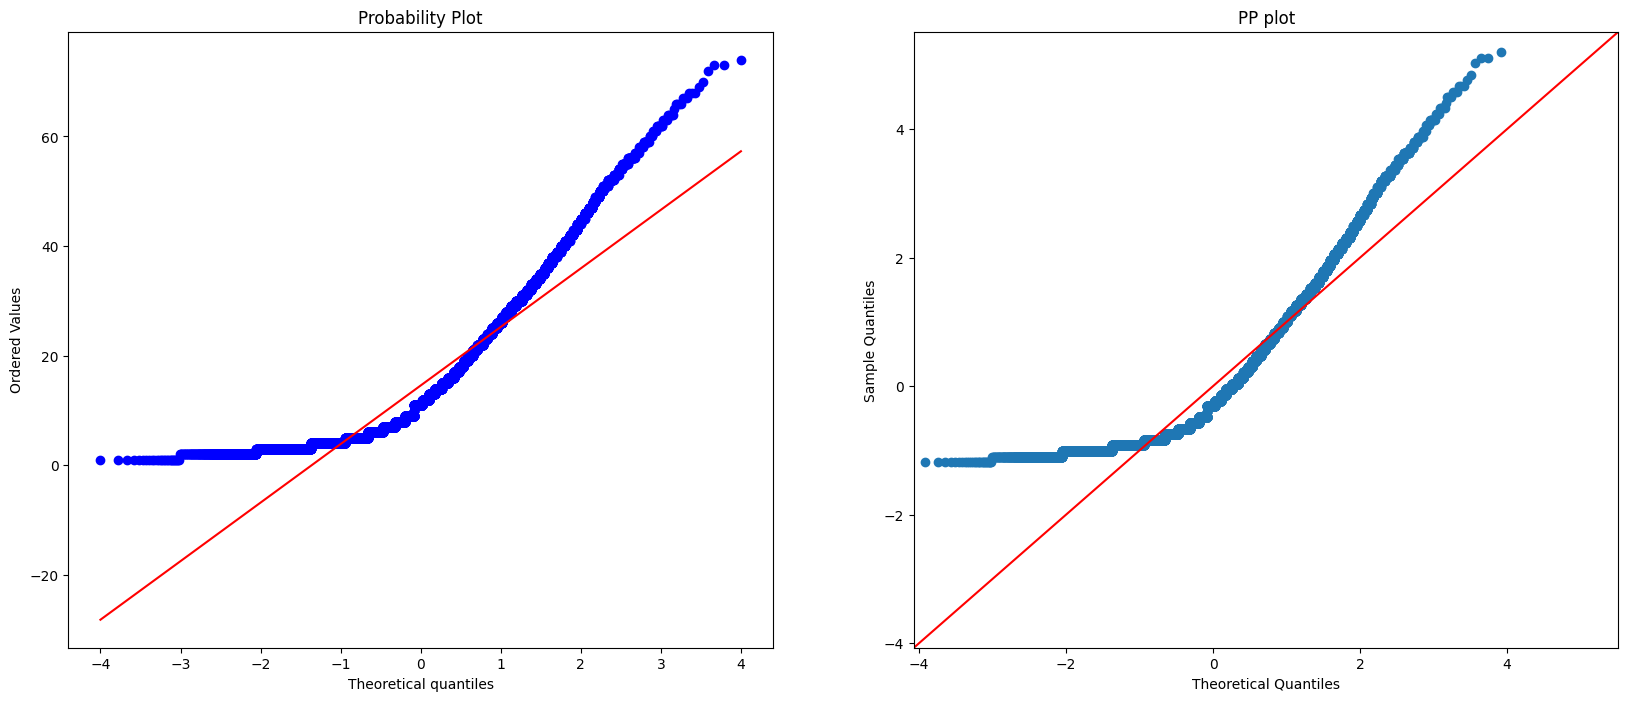

In [257]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].set_title('PP plot')
ax[1].set_title('PP plot')
# QQ plot
sm.qqplot(df["MUNKA_EV"], stats.norm, fit=True, line='45', ax=ax[1])
# PP plot
stats.probplot(df["MUNKA_EV"], plot=ax[0])
plt.show()

In [258]:
print("Skewness of the working years variable is", df['MUNKA_EV'].skew())

Skewness of the working years variable is 1.2808757588725843


C:\Users\PocsG\AppData\Local\Temp\ipykernel_5652\2926815887.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)


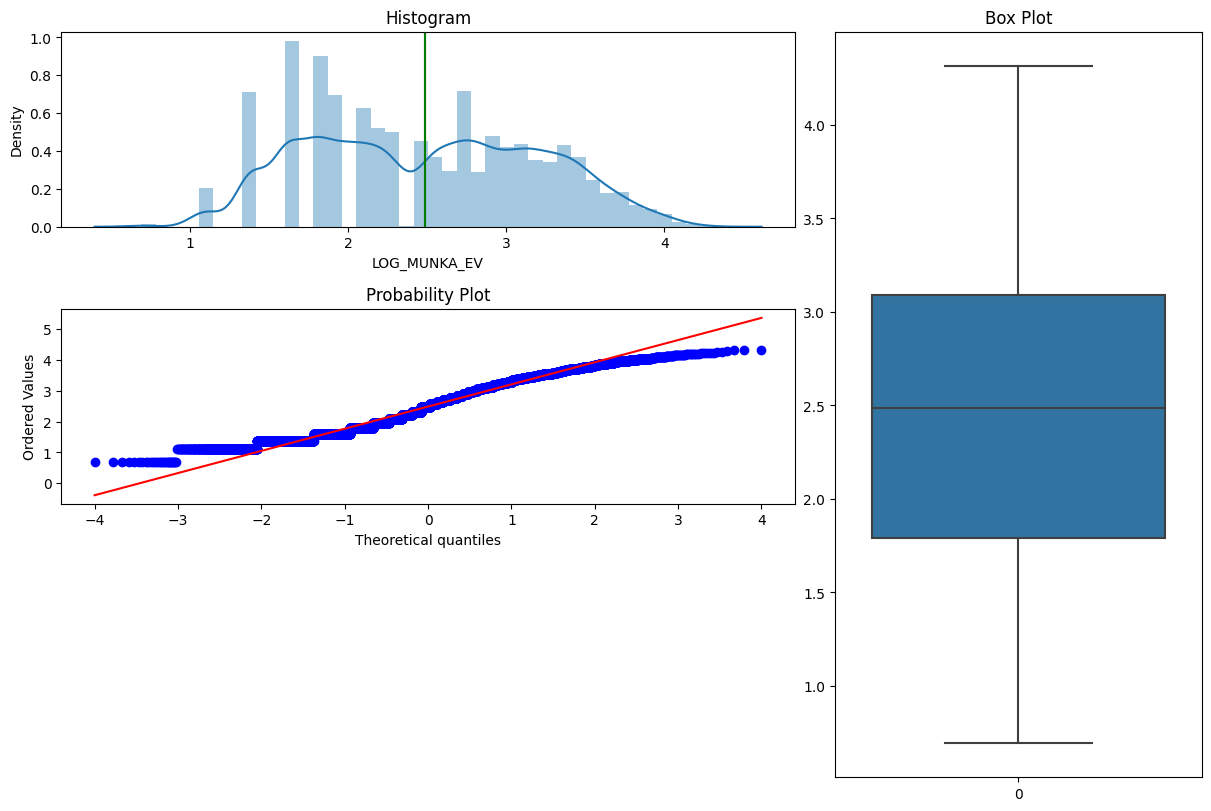

In [259]:
df['LOG_MUNKA_EV'] = np.log1p(df["MUNKA_EV"])
three_chart_plot(df, 'LOG_MUNKA_EV')

In [260]:
stats.kstest(df["MUNKA_EV"], stats.norm.cdf)

KstestResult(statistic=0.978649190765126, pvalue=0.0, statistic_location=3, statistic_sign=-1)

In [261]:
stats.kstest(df["LOG_MUNKA_EV"], stats.norm.cdf)

KstestResult(statistic=0.8971705697950577, pvalue=0.0, statistic_location=1.3862943611198906, statistic_sign=-1)

In [262]:
df['BOXCOX_MUNKA_EV'], _ = stats.boxcox(df['MUNKA_EV'])
stats.kstest(df["BOXCOX_MUNKA_EV"], stats.norm.cdf)

KstestResult(statistic=0.848348872186078, pvalue=0.0, statistic_location=1.118624344505852, statistic_sign=-1)

Similarly to the variable of salary the working year remaind not-normally distributed after the transformation.

#### Age of the client

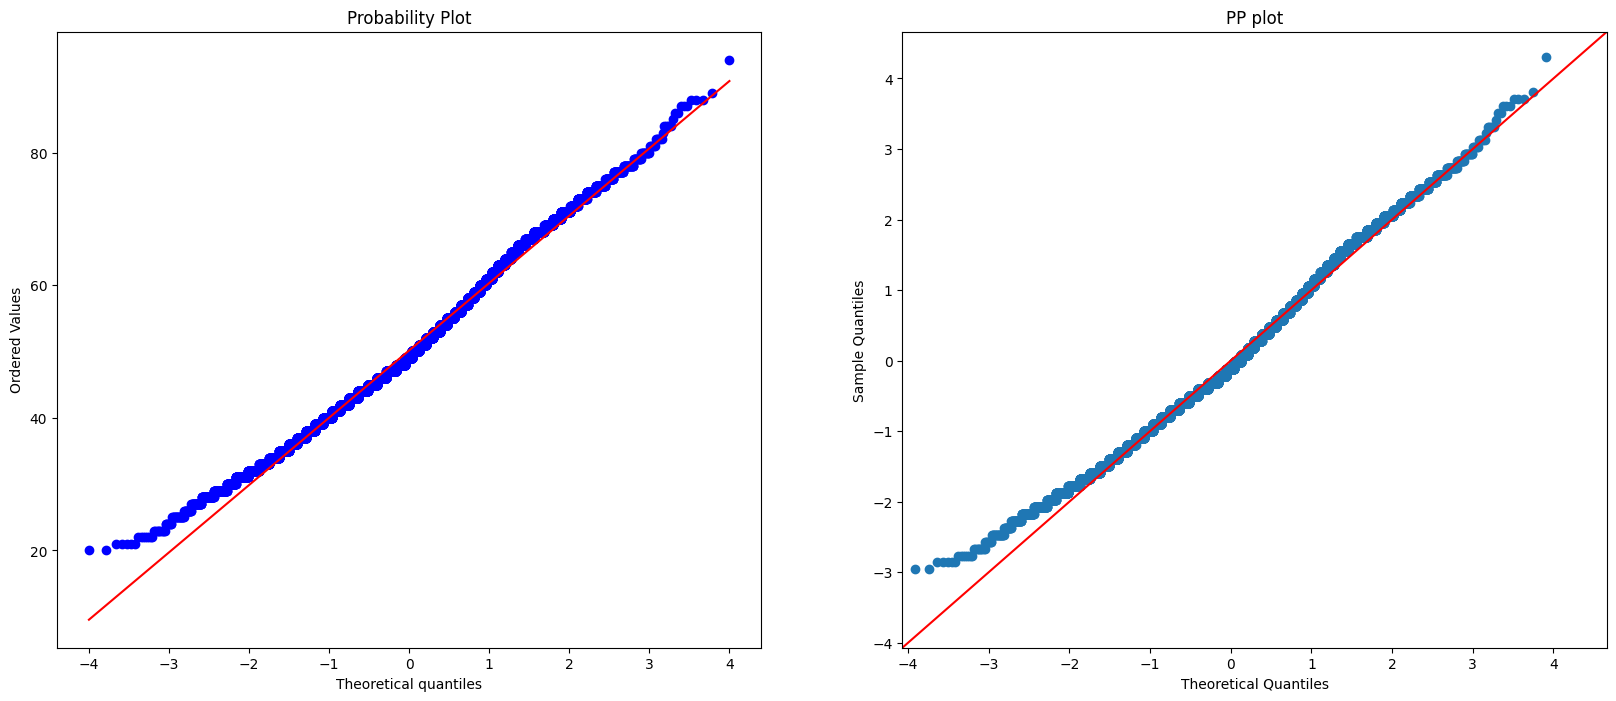

In [263]:
#Age of the deptor (in years)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].set_title('PP plot')
ax[1].set_title('PP plot')
# QQ plot
sm.qqplot(df["EMBER_EV"], stats.norm, fit=True, line='45', ax=ax[1])
# PP plot
stats.probplot(df["EMBER_EV"], plot=ax[0])
plt.show()

In [264]:
print("Skewness of the client's age variable is", df['EMBER_EV'].skew())

Skewness of the client's age variable is 0.2862266177030675


In [265]:
df['LOG_EMBER_EV'] = np.log1p(df["EMBER_EV"])

C:\Users\PocsG\AppData\Local\Temp\ipykernel_5652\2926815887.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)


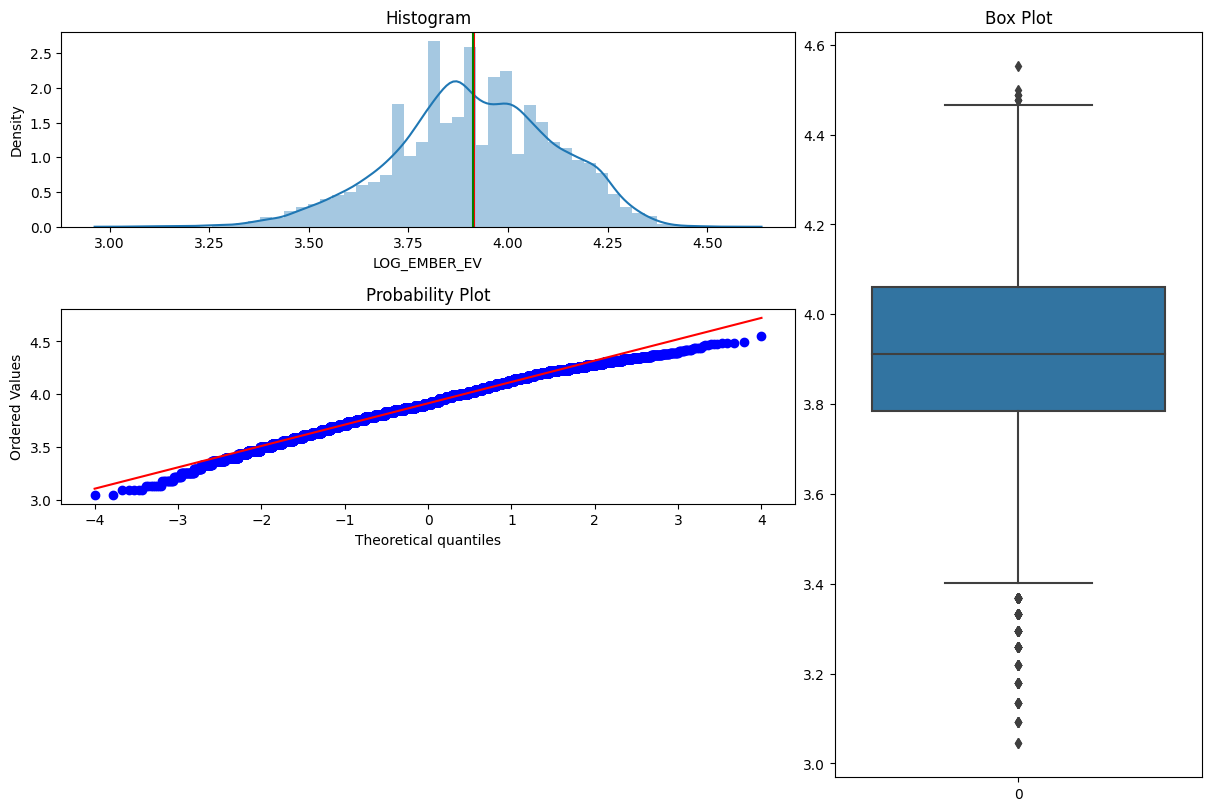

In [266]:
three_chart_plot(df, 'LOG_EMBER_EV')

In [267]:
stats.kstest(df["EMBER_EV"], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=20, statistic_sign=-1)

In [268]:
stats.kstest(df["LOG_EMBER_EV"], stats.norm.cdf)

KstestResult(statistic=0.998911604102097, pvalue=0.0, statistic_location=3.091042453358316, statistic_sign=-1)

In [269]:
df['BOXCOX_EMBER_EV'], _ = stats.boxcox(df['EMBER_EV'])
stats.kstest(df["BOXCOX_EMBER_EV"], stats.norm.cdf)

KstestResult(statistic=0.9999999999410888, pvalue=0.0, statistic_location=6.442111773812143, statistic_sign=-1)

### Correlation

<AxesSubplot: >

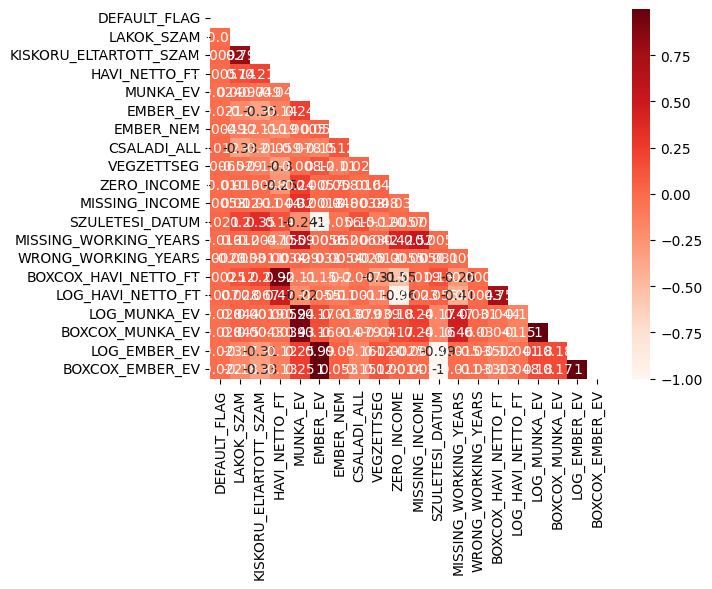

In [270]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Reds')

The correlation coefficient is high (0.79) between the residents number and number of underages in the household.
Firstly we are going to remove the resindent's number variable.

In [271]:
df.drop(columns=["LAKOK_SZAM"], inplace=True)

## Modelling

In [272]:
df_final_res =  pd.DataFrame(columns=["method", "best_accuracy_train", "best_accuracy_test"])

In [273]:
num_col_list = ['KISKORU_ELTARTOTT_SZAM','HAVI_NETTO_FT', 'MUNKA_EV', 'EMBER_EV', 'VEGZETTSEG', "LOG_HAVI_NETTO_FT", "BOXCOX_HAVI_NETTO_FT", "LOG_MUNKA_EV", "BOXCOX_MUNKA_EV", "LOG_EMBER_EV", "BOXCOX_EMBER_EV"]
cat_col_list = ['EMBER_NEM', 'CSALADI_ALL']
bool_col_list = ["ZERO_INCOME", "MISSING_INCOME", "MISSING_WORKING_YEARS", "WRONG_WORKING_YEARS"]

In [274]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[num_col_list])
normalized_data = scaler.transform(df[num_col_list])

df_num = pd.DataFrame(normalized_data, columns=num_col_list, index=df.index)

In [275]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

ohe.fit(df[cat_col_list])
df_enc = ohe.transform(df[cat_col_list])

In [276]:
X = pd.concat([df_num, df_enc, df[bool_col_list]], axis=1)
y = df["DEFAULT_FLAG"].copy()

At this point I exclude the previously calculated variables due to the issues of the distributions. 

In [277]:
vars_drop = [ "LOG_HAVI_NETTO_FT", "BOXCOX_HAVI_NETTO_FT", "LOG_MUNKA_EV", "BOXCOX_MUNKA_EV", "LOG_EMBER_EV", "BOXCOX_EMBER_EV"]
X.drop(columns=vars_drop, inplace=True)

In [278]:
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
train_outlier_percent = y_train[y_train==1].shape[0] / y_train.shape[0]
test_outlier_percent = y_test[y_test==1].shape[0] / y_test.shape[0]
outlier_percent = y[y==1].shape[0] / y.shape[0]

print("Defaulted ratio in train set is {}%".format(round(train_outlier_percent*100,2)))
print("Defaulted ratio in test set is {}%".format(round(test_outlier_percent*100,2)))
print("Defaulted ratio in set is {}%".format(round(outlier_percent*100,2)))

Defaulted ratio in train set is 0.54%
Defaulted ratio in test set is 0.62%
Defaulted ratio in set is 0.56%


#### Functions

In [280]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

def measure_performance(y_train_pred, y_train_true, y_test_pred, y_test_true):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # Performance on Train Data
    print('Balanced accuracy on the train data: ', balanced_accuracy_score(y_train_true, y_train_pred))
    
    # Confusion Matrix (Train)
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    cm_display_train.plot(ax=axs[0, 0])
    axs[0, 0].set_title('Confusion Matrix - Train Data')

    # ROC Curve (Train)
    fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred)
    auc_train = roc_auc_score(y_train_true, y_train_pred)
    axs[1, 0].plot(fpr_train, tpr_train, label="Train AUC="+str(auc_train), color='blue', linewidth=2)
    axs[1, 0].plot([0, 1], [0, 1], color='red', linewidth=2)
    axs[1, 0].set_ylabel('True Positive Rate')
    axs[1, 0].set_xlabel('False Positive Rate')
    axs[1, 0].legend(loc=4)
    axs[1, 0].set_title('ROC Curve - Train Data')

    # Performance on Test Data
    print('Balanced accuracy on the test data: ', balanced_accuracy_score(y_test_true, y_test_pred))
    
    # Confusion Matrix (Test)
    cm_test = confusion_matrix(y_test_true, y_test_pred)
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    cm_display_test.plot(ax=axs[0, 1])
    axs[0, 1].set_title('Confusion Matrix - Test Data')

    # ROC Curve (Test)
    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred)
    auc_test = roc_auc_score(y_test_true, y_test_pred)
    axs[1, 1].plot(fpr_test, tpr_test, label="Test AUC="+str(auc_test), color='green', linewidth=2)
    axs[1, 1].plot([0, 1], [0, 1], color='red', linewidth=2)
    axs[1, 1].set_ylabel('True Positive Rate')
    axs[1, 1].set_xlabel('False Positive Rate')
    axs[1, 1].legend(loc=4)
    axs[1, 1].set_title('ROC Curve - Test Data')

    plt.tight_layout()
    plt.show()

### Simple logistic regression without WOE

All possible model with sklearn logit regression. The number of explanatory variables defined beforehand.

In [281]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [282]:
import itertools
from sklearn import linear_model

def generate_possible_models(exp_variable_nr, variables, target, test_variables, test_target):
    df_results = pd.DataFrame(columns=["relevant_vars", "train_accuracy", "test_accuracy"])
    
    columns = variables.columns.tolist()
    combinations = list(itertools.combinations(columns, exp_variable_nr))
    
    best_accuracy_on_train = 0
    best_accuracy_on_test = 0
    best_variables_on_train = []
    best_variables_on_test = []
    
    for idx, combo in enumerate(combinations):
        model = linear_model.LogisticRegression(fit_intercept=True)
        model.fit(variables[list(combo)], target)
        y_pred_train = model.predict_proba(variables[list(combo)])
        y_pred_train = np.where(y_pred_train[:, 1] > outlier_percent, 1,0)

        y_pred_test = model.predict_proba(test_variables[list(combo)])
        y_pred_test = np.where(y_pred_test[:, 1] > outlier_percent, 1,0)

        train_acc = balanced_accuracy_score(target, y_pred_train)
        if train_acc > best_accuracy_on_train:
            best_accuracy_on_train = train_acc
            best_variables_on_train = list(combo)

        test_acc = balanced_accuracy_score(test_target, y_pred_test)
        if test_acc > best_accuracy_on_test:
            best_accuracy_on_test = test_acc
            best_variables_on_test = list(combo)

        df_results.at[idx, "relevant_vars"] = combo
        df_results.at[idx, "train_accuracy"] = train_acc
        df_results.at[idx, "test_accuracy"] = test_acc
    
    df_results["temp"] = df_results["test_accuracy"]
    df_results.sort_values('temp', ascending=False, inplace=True)
    df_results.drop(columns=["temp"], inplace=True)
    return df_results

In [93]:
df_linear_3 = generate_possible_models(3, X_train, y_train, X_test, y_test)
df_linear_3.head(10)

relevant_vars train_accuracy  \
322          (EMBER_EV, CSALADI_ALL_3, MISSING_INCOME)       0.598247   
324     (EMBER_EV, CSALADI_ALL_3, WRONG_WORKING_YEARS)       0.594983   
320           (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_5)        0.59483   
307           (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_5)       0.606645   
321             (EMBER_EV, CSALADI_ALL_3, ZERO_INCOME)       0.589247   
123           (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_3)       0.594754   
310   (EMBER_EV, CSALADI_ALL_1, MISSING_WORKING_YEARS)       0.619839   
32   (KISKORU_ELTARTOTT_SZAM, EMBER_EV, CSALADI_ALL_3)       0.590865   
325           (EMBER_EV, CSALADI_ALL_4, CSALADI_ALL_5)       0.604465   
305           (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_3)       0.603162   

    test_accuracy  
322      0.704222  
324      0.701127  
320      0.691845  
307      0.689073  
321      0.688292  
123      0.683869  
310      0.683296  
32       0.683182  
325      0.676238  
305      0.676055

In [94]:
df_linear_4 = generate_possible_models(4, X_train, y_train, X_test, y_test)
df_linear_4.head(10)

relevant_vars train_accuracy  \
1293  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, MISSI...       0.624596   
1261  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_5, MISSI...       0.653369   
1248  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_3, CSALA...       0.600514   
1249  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_3, CSALA...       0.625599   
1303  (EMBER_EV, CSALADI_ALL_3, MISSING_INCOME, WRON...       0.598276   
215   (KISKORU_ELTARTOTT_SZAM, EMBER_EV, CSALADI_ALL...       0.603539   
566   (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_1, CSALA...       0.602122   
1270  (EMBER_EV, CSALADI_ALL_2, CSALADI_ALL_3, CSALA...        0.61093   
1295  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_5, ZERO_...       0.605247   
1271  (EMBER_EV, CSALADI_ALL_2, CSALADI_ALL_3, ZERO_...       0.607409   

     test_accuracy  
1293       0.72996  
1261      0.728126  
1248      0.707524  
1249      0.706149  
1303      0.704222  
215       0.704107  
566       0.703122  
1270      0.700143  
1295      0.698835  
1271      0.698653

In [95]:
df_linear_5 = generate_possible_models(5, X_train, y_train, X_test, y_test)
df_linear_5.head(10)

relevant_vars train_accuracy  \
1839  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_3, CSALA...       0.623914   
3546  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, ZERO_...       0.625484   
1807  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_1, CSALA...       0.644561   
3550  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, MISSI...       0.624625   
3548  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, MISSI...       0.624596   
3497  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_5, ZERO_...       0.653827   
3478  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_3, CSALA...        0.65377   
3501  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_5, MISSI...       0.653455   
3543  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, CSALA...       0.629225   
1805  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_1, CSALA...       0.609785   

     test_accuracy  
1839      0.735804  
3546      0.731679  
1807      0.730533  
3550      0.730074  
3548      0.729731  
3497      0.729501  
3478       0.72847  
3501      0.728241  
3543      0.722167  
1805      0.720724

In [96]:
df_linear_6 = generate_possible_models(6, X_train, y_train, X_test, y_test)
df_linear_6.head(10)

relevant_vars train_accuracy  \
4187  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_3, CSALA...       0.623942   
2178  (KISKORU_ELTARTOTT_SZAM, EMBER_EV, CSALADI_ALL...       0.634182   
2181  (KISKORU_ELTARTOTT_SZAM, EMBER_EV, CSALADI_ALL...       0.628175   
4115  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_1, CSALA...       0.647653   
4183  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_3, CSALA...       0.621165   
7071  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, ZERO_...       0.625512   
7069  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, ZERO_...       0.625398   
4138  (HAVI_NETTO_FT, EMBER_EV, CSALADI_ALL_1, CSALA...       0.644389   
7004  (EMBER_EV, CSALADI_ALL_1, CSALADI_ALL_3, CSALA...       0.654572   
7072  (EMBER_EV, CSALADI_ALL_3, CSALADI_ALL_4, MISSI...       0.624625   

     test_accuracy  
4187      0.735804  
2178      0.735804  
2181      0.735231  
4115      0.733971  
4183      0.733169  
7071      0.731793  
7069       0.73145  
4138      0.730533  
7004      0.730074  
7072      0.729845

Final test with forward selection

In [283]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [284]:
forward_model = linear_model.LogisticRegression(fit_intercept=True)
forwad = SequentialFeatureSelector(
forward_model,
k_features=4,
forward=True,
verbose=1,
scoring="neg_mean_squared_error"
)
sf = forwad.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.5s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.0s finished
Features: 4/4

In [285]:
feat_names = list(sf.k_feature_names_)
print(feat_names)

['KISKORU_ELTARTOTT_SZAM', 'HAVI_NETTO_FT', 'MUNKA_EV', 'EMBER_EV']


In [286]:
import statsmodels.api as sm
sm_logreg = sm.Logit(y_train, X_train[feat_names]).fit() 

Optimization terminated successfully.
         Current function value: 0.037708
         Iterations 10


In [287]:
print(sm_logreg.summary()) 

                           Logit Regression Results                           
Dep. Variable:           DEFAULT_FLAG   No. Observations:                17559
Model:                          Logit   Df Residuals:                    17555
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                 -0.1211
Time:                        14:41:37   Log-Likelihood:                -662.11
converged:                       True   LL-Null:                       -590.59
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
KISKORU_ELTARTOTT_SZAM    -3.2954      1.275     -2.585      0.010      -5.794      -0.797
HAVI_NETTO_FT            -17.8436      2.454     -7.270      0.000     -22.654     -13.033
MUNK

In [288]:
y_pred_sm_train = sm_logreg.predict(X_train[feat_names])
y_pred_sm_test = sm_logreg.predict(X_test[feat_names])

y_pred_sm_train = np.where(y_pred_sm_train > outlier_percent, 1,0)
y_pred_sm_test = np.where(y_pred_sm_test > outlier_percent, 1,0)

Balanced accuracy on the train data:  0.6331058310201101
Balanced accuracy on the test data:  0.565819008124985


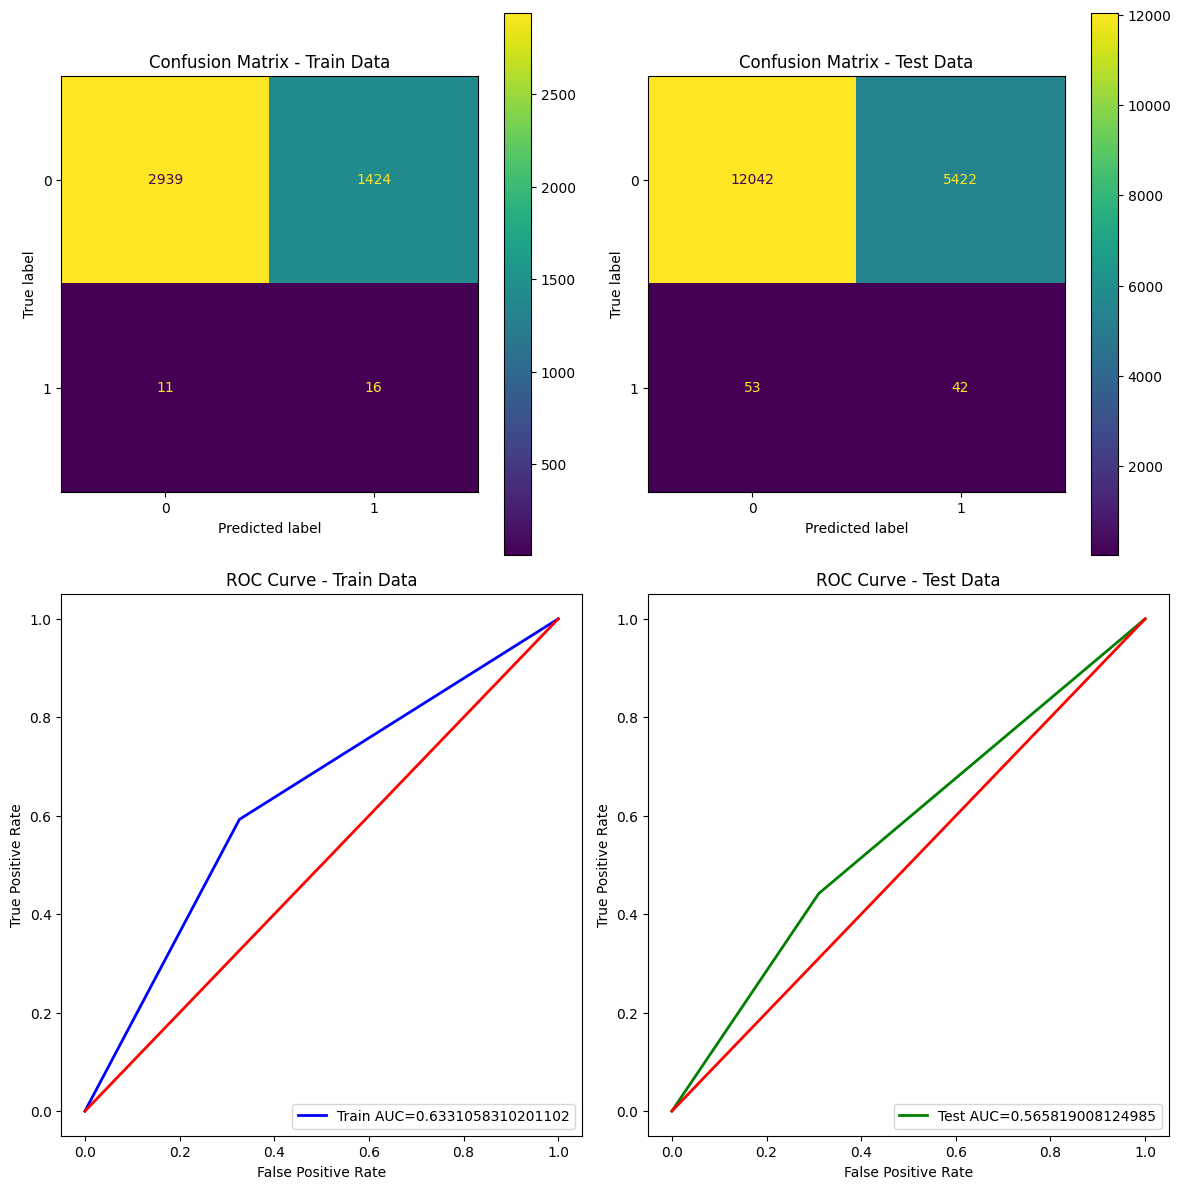

In [289]:
measure_performance(y_pred_sm_train, y_train, y_pred_sm_test, y_test)

Coose the best model

In [105]:
chosen_vars = list(df_linear_5.iloc[0]['relevant_vars'])
chosen_vars

['HAVI_NETTO_FT',
 'EMBER_EV',
 'CSALADI_ALL_3',
 'CSALADI_ALL_4',
 'MISSING_WORKING_YEARS']

In [106]:
model = linear_model.LogisticRegression(fit_intercept=True)
model.fit(X_train[chosen_vars], y_train)
y_pred_train = model.predict_proba(X_train[chosen_vars])
y_pred_test = model.predict_proba(X_test[chosen_vars])

y_pred_train = np.where(y_pred_train[:, 1] > outlier_percent, 1,0)
y_pred_test = np.where(y_pred_test[:, 1] > outlier_percent, 1,0)

Balanced accuracy on the train data:  0.623913855871929
Balanced accuracy on the test data:  0.7358044498773355


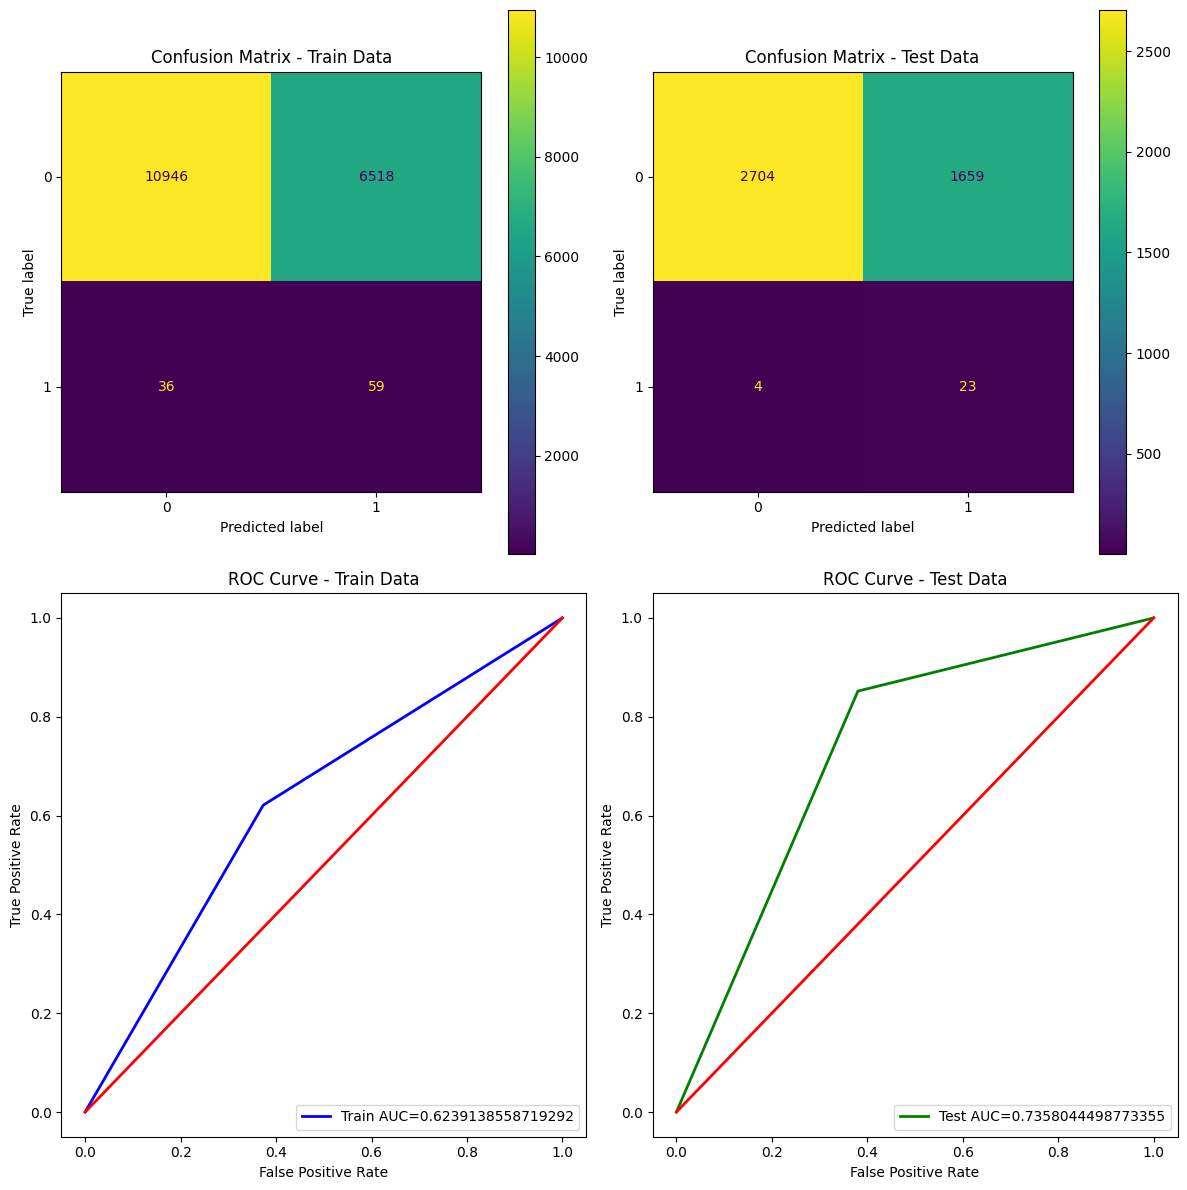

In [107]:
measure_performance(y_pred_train, y_train, y_pred_test, y_test)

Append the results to the final dataframe

In [133]:
df_final_res = df_final_res.append({"method":"Logistic regression without WOE 3 variables", 
                     "best_accuracy_train":df_linear_3.iloc[0]["train_accuracy"],
                     "best_accuracy_test":df_linear_3.iloc[0]["test_accuracy"]}, ignore_index=True)

df_final_res = df_final_res.append({"method":"Logistic regression without WOE 4 variables", 
                     "best_accuracy_train":df_linear_4.iloc[0]["train_accuracy"],
                     "best_accuracy_test":df_linear_4.iloc[0]["test_accuracy"]}, ignore_index=True)

df_final_res = df_final_res.append({"method":"Logistic regression without WOE 5 variables", 
                     "best_accuracy_train":df_linear_5.iloc[0]["train_accuracy"],
                     "best_accuracy_test":df_linear_5.iloc[0]["test_accuracy"]}, ignore_index=True)

df_final_res = df_final_res.append({"method":"Logistic regression without WOE 6 variables", 
                     "best_accuracy_train":df_linear_6.iloc[0]["train_accuracy"],
                     "best_accuracy_test":df_linear_6.iloc[0]["test_accuracy"]}, ignore_index=True)

df_final_res = df_final_res.append({"method":"Logistic regression without WOE - forward selection", 
                     "best_accuracy_train":balanced_accuracy_score(y_train, y_pred_sm_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, y_pred_sm_test)}, ignore_index=True)

### Logistic regression with WOE

Before any other steps, the datasets needs to be recreated because WOE algorithm requres non-encoded variables.

In [134]:
import scorecardpy as sc
import sidetable as stb
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=vars_drop + ["DEFAULT_FLAG", "SZULETESI_DATUM"]), df["DEFAULT_FLAG"], test_size=0.2, random_state=42) 

In [136]:
woe_train = sc.woebin(dt = df.drop(columns=vars_drop + ["SZULETESI_DATUM"]), y = "DEFAULT_FLAG", x=None, method="tree", positive="bad|1")

[INFO] creating woe binning ...


Applying woe binning on train and test sample

In [137]:
train_data_woe = sc.woebin_ply(X_train, woe_train)
test_data_woe = sc.woebin_ply(X_test, woe_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


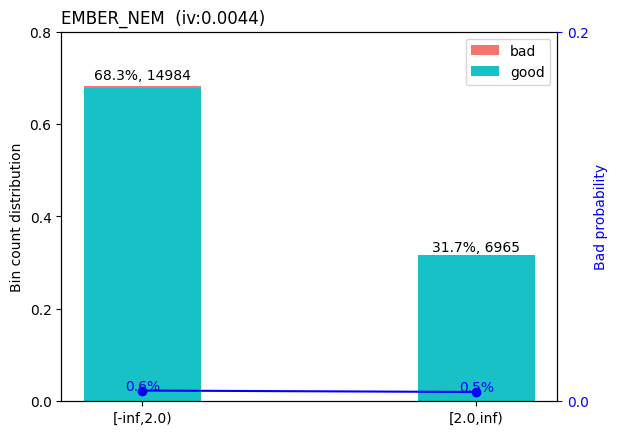

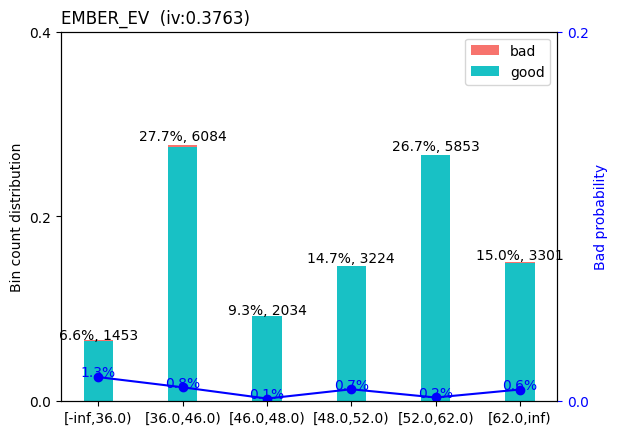

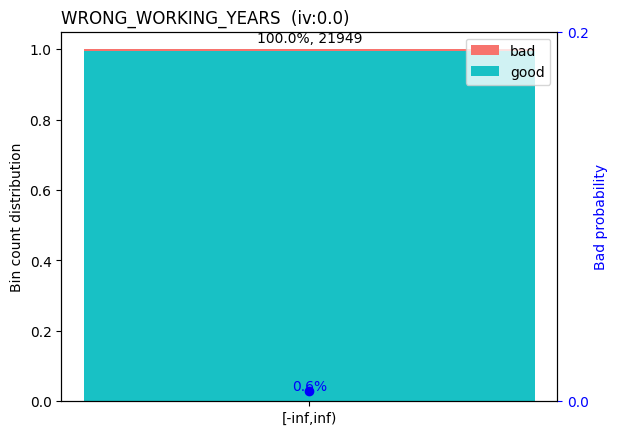

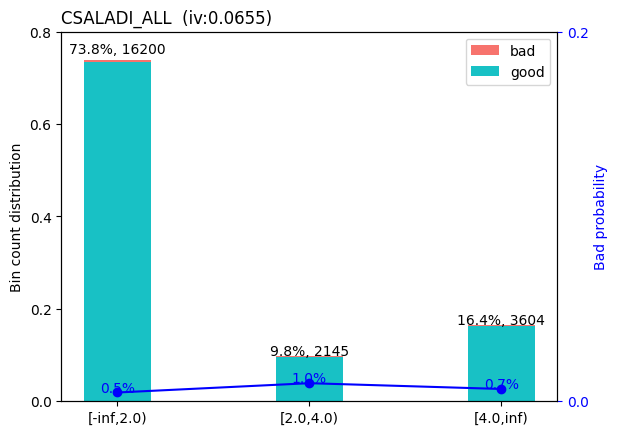

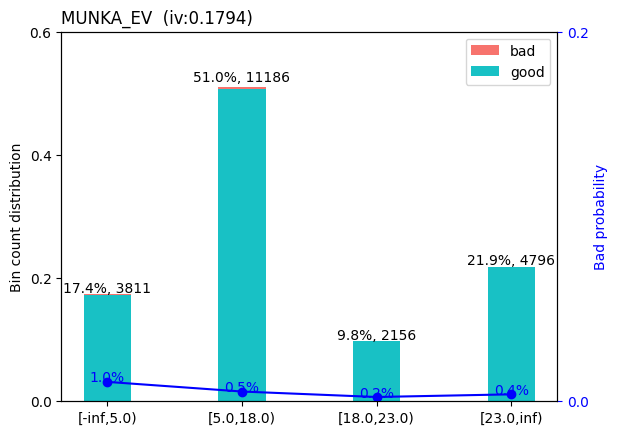

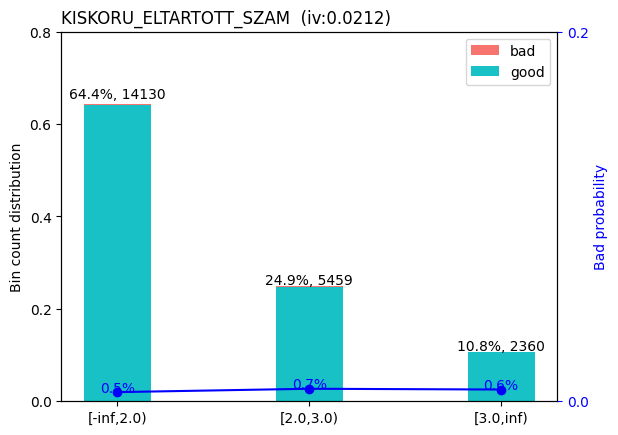

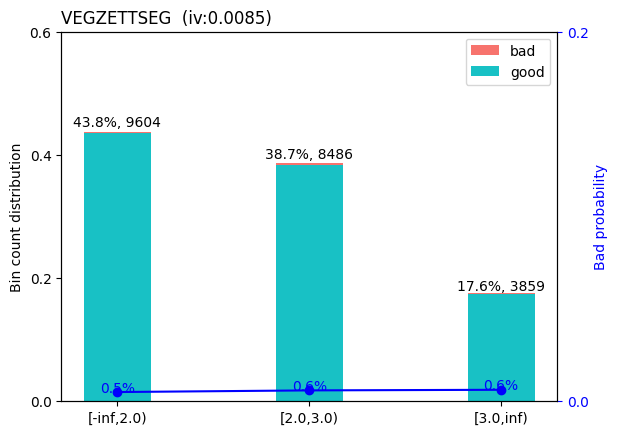

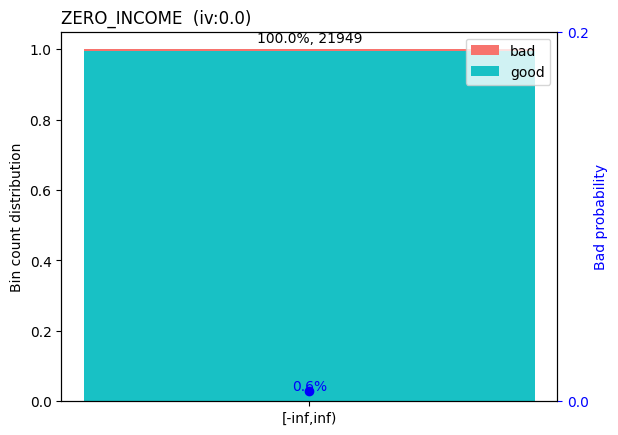

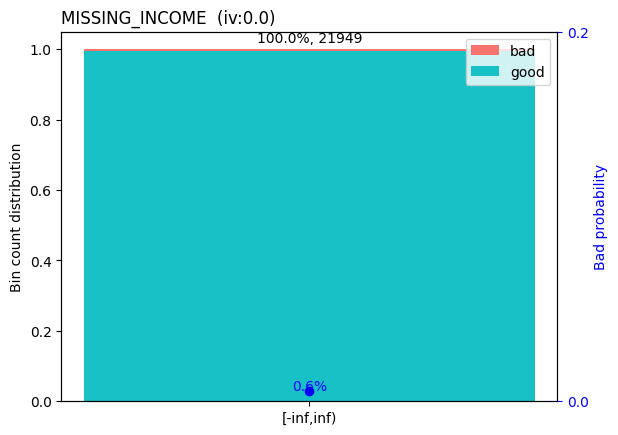

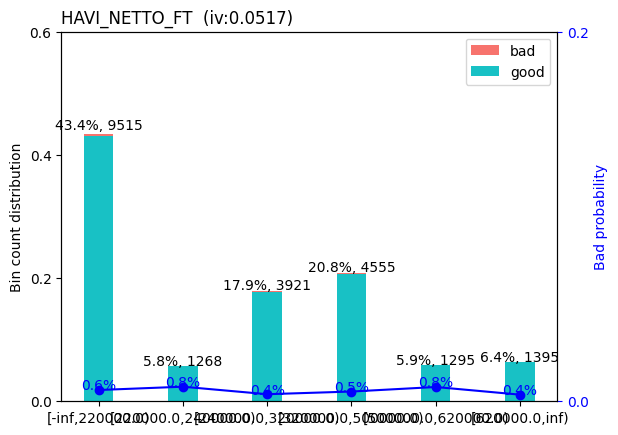

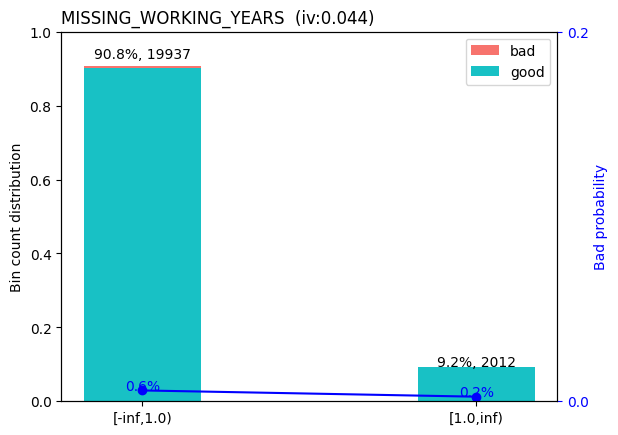

In [138]:
woebin_plot = sc.woebin_plot(woe_train)
wp_keys = woebin_plot.keys()

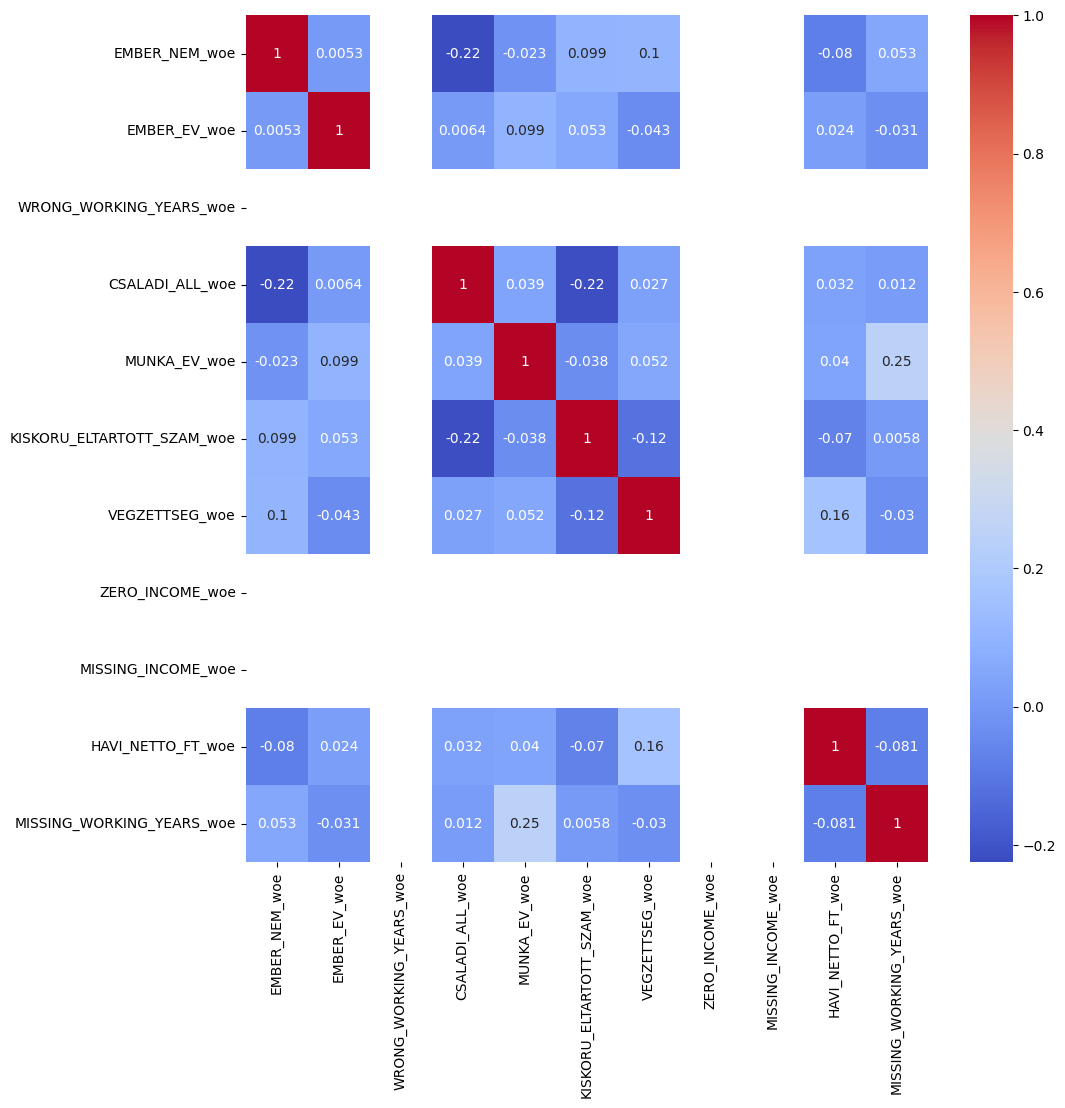

In [139]:
correl_matrix_train = train_data_woe.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(train_data_woe.shape[1], train_data_woe.shape[1]))
ax = sns.heatmap(correl_matrix_train,
            cmap = 'coolwarm',
            annot = True)

plt.show()

In [140]:
sorted = pd.DataFrame(correl_matrix_train.abs().unstack().sort_values(ascending=False).drop_duplicates().reset_index().rename(columns={
                 'level_0': 'Variable 1',
                 'level_1': 'V2',
                 0: 'Correlation'}))

# Filtering for correlating variable pairs (threshold = 0.6)
correlated_variables = sorted.query('Correlation > 0.6 and Correlation < 1')
correlated_variables

Empty DataFrame
Columns: [Variable 1, V2, Correlation]
Index: []

Information value of data

In [141]:
IV_train_data = sc.iv(dt = pd.concat([train_data_woe, y_train], axis=1), y = 'DEFAULT_FLAG', positive = "bad|1", order = True)
IV_train_data.columns = ["Variable 1", "Information value"]
IV_train_data

Variable 1  Information value
0                 EMBER_EV_woe           0.318465
8                 MUNKA_EV_woe           0.269978
4    MISSING_WORKING_YEARS_woe           0.110148
5              CSALADI_ALL_woe           0.049646
2            HAVI_NETTO_FT_woe           0.025078
6               VEGZETTSEG_woe           0.015265
1                EMBER_NEM_woe           0.014786
9   KISKORU_ELTARTOTT_SZAM_woe           0.012736
3      WRONG_WORKING_YEARS_woe           0.000000
7           MISSING_INCOME_woe           0.000000
10             ZERO_INCOME_woe           0.000000

Variable selection based on correlation by assigning information value and dropping variable from correlating pairs with lower IV


In [142]:
IV1 = pd.merge(correlated_variables, IV_train_data, on = 'Variable 1', how = 'left').set_axis(['V1',
                                                       'Variable 1', 'Correlation', 'IV1'], axis='columns')

IV2 = pd.merge(IV1, IV_train_data, on = 'Variable 1', how = 'left').set_axis(['V1', 'V2',
                                                        'Correlation', 'IV1', 'IV2'], axis='columns')

# Choosing variable with lower IV from pairs to drop
to_drop = IV2.assign(to_drop = np.where(IV2['IV1'] > IV2['IV2'], 'V2', 'V1'))
to_drop_name = to_drop.assign(to_drop_name = np.where(to_drop['to_drop'] == 'V2', to_drop['V2'], to_drop['V1']))

# Defining final list of variables to drop based on correlation
drop_correl = list(to_drop_name['to_drop_name'])

Defining GINI function

In [143]:
variable_i = train_data_woe.columns

def gini(variable_i):
    y = np.array(y_train)
    x = np.array(train_data_woe[variable_i])
    return  roc_auc_score(y, x)

In [144]:
mylist_1 = list(range(len(variable_i)))
GINI = []

for i in variable_i:
    value = gini(i)
    GINI.append(value)

Gini_dict = {'Variable': variable_i, 'GINI': GINI}
Gini_df = pd.DataFrame(Gini_dict)
Gini_df.sort_values(['GINI'], ascending=False, inplace=True)
Gini_df

Variable      GINI
1                 EMBER_EV_woe  0.635890
4                 MUNKA_EV_woe  0.633729
3              CSALADI_ALL_woe  0.551340
9            HAVI_NETTO_FT_woe  0.538277
10   MISSING_WORKING_YEARS_woe  0.535511
6               VEGZETTSEG_woe  0.529277
0                EMBER_NEM_woe  0.527577
5   KISKORU_ELTARTOTT_SZAM_woe  0.527325
2      WRONG_WORKING_YEARS_woe  0.500000
7              ZERO_INCOME_woe  0.500000
8           MISSING_INCOME_woe  0.500000

Variable selection based on GINI (<0.15) and correlation (>0.6)

In [145]:
variables_below_GINIthreshold = Gini_df.query('GINI < 0.15')
variables_below_GINIthreshold

drop_GINI = list(variables_below_GINIthreshold['Variable'])
drop_GINI

# Drop variables from train dataset
to_drop_variables = drop_correl + drop_GINI

presel_train = train_data_woe.drop(columns = to_drop_variables)
presel_train

EMBER_NEM_woe  EMBER_EV_woe  WRONG_WORKING_YEARS_woe  CSALADI_ALL_woe  \
20060       0.043875      0.309695                      0.0        -0.157315   
5934       -0.101385      0.135806                      0.0        -0.157315   
9263       -0.101385     -1.000869                      0.0        -0.157315   
12832       0.043875     -1.000869                      0.0        -0.157315   
10071       0.043875     -1.000869                      0.0         0.181818   
...              ...           ...                      ...              ...   
11964      -0.101385      0.159561                      0.0        -0.157315   
21575       0.043875     -1.330789                      0.0        -0.157315   
5390       -0.101385      0.309695                      0.0        -0.157315   
860         0.043875      0.863098                      0.0         0.181818   
15795       0.043875     -1.000869                      0.0        -0.157315   

       MUNKA_EV_woe  KISKORU_ELTARTOTT_SZAM_woe  VEGZETTSEG_woe  \
20060     -0.052710                   -0.115712       -0.106842   
5934       0.640666                   -0.115712        0.058641   
9263      -0.394524                   -0.115712       -0.106842   
12832     -0.052710                   -0.115712       -0.106842   
10071     -0.394524                   -0.115712        0.058641   
...             ...                         ...             ...   
11964     -0.394524                   -0.115712        0.058641   
21575     -0.052710                   -0.115712        0.113011   
5390      -0.052710                    0.199580       -0.106842   
860       -0.052710                   -0.115712        0.058641   
15795     -0.394524                    0.199580       -0.106842   

       ZERO_INCOME_woe  MISSING_INCOME_woe  HAVI_NETTO_FT_woe  \
20060              0.0                 0.0          -0.440739   
5934               0.0                 0.0           0.092814   
9263               0.0                 0.0          -0.440739   
12832              0.0                 0.0          -0.375337   
10071              0.0                 0.0           0.092814   
...                ...                 ...                ...   
11964              0.0                 0.0           0.352189   
21575              0.0                 0.0          -0.375337   
5390               0.0                 0.0           0.092814   
860                0.0                 0.0          -0.375337   
15795              0.0                 0.0           0.330953   

       MISSING_WORKING_YEARS_woe  
20060                   0.054609  
5934                    0.054609  
9263                    0.054609  
12832                   0.054609  
10071                   0.054609  
...                          ...  
11964                   0.054609  
21575                   0.054609  
5390                    0.054609  
860                     0.054609  
15795                   0.054609  

[17559 rows x 11 columns]

 Variable selection based on IV (threshold = 0.1)

In [146]:
varsel_train = sc.var_filter(pd.concat([presel_train, y_train], axis=1), y = 'DEFAULT_FLAG', x = None, iv_limit = 0.1, positive = 'bad|1')
varsel_train

[INFO] filtering variables ...


EMBER_EV_woe  MISSING_WORKING_YEARS_woe  MUNKA_EV_woe  DEFAULT_FLAG
20060      0.309695                   0.054609     -0.052710             0
5934       0.135806                   0.054609      0.640666             0
9263      -1.000869                   0.054609     -0.394524             0
12832     -1.000869                   0.054609     -0.052710             0
10071     -1.000869                   0.054609     -0.394524             0
...             ...                        ...           ...           ...
11964      0.159561                   0.054609     -0.394524             0
21575     -1.330789                   0.054609     -0.052710             0
5390       0.309695                   0.054609     -0.052710             0
860        0.863098                   0.054609     -0.052710             0
15795     -1.000869                   0.054609     -0.394524             0

[17559 rows x 4 columns]

 Removing variables from test sample (based on train sample)

In [147]:
cols1 = varsel_train.columns
varsel_test = test_data_woe[cols1.drop("DEFAULT_FLAG")]
varsel_test

EMBER_EV_woe  MISSING_WORKING_YEARS_woe  MUNKA_EV_woe
7293      -1.330789                  -0.808076     -0.394524
16375     -1.000869                   0.054609     -0.052710
12845     -1.000869                   0.054609     -0.052710
199        0.159561                   0.054609     -0.052710
10906     -1.000869                   0.054609     -0.394524
...             ...                        ...           ...
4420       0.159561                   0.054609     -0.052710
13640     -1.000869                   0.054609     -0.052710
6392       0.309695                   0.054609     -0.052710
18992     -1.000869                   0.054609      0.640666
6812       0.309695                   0.054609     -0.052710

[4390 rows x 3 columns]

Multicollinearity (VIF) and defining final datasets

In [148]:
Relevant_variable = varsel_train.drop(columns=['DEFAULT_FLAG']).columns.tolist()
VIF = []

def multicoll(n):
    dependent_var = Relevant_variable[n]
    independent_vars = Relevant_variable[:n] + Relevant_variable[n+1:]
    X = sm.add_constant(varsel_train[independent_vars])
    linreg1 = sm.OLS(varsel_train[dependent_var], X).fit()
    r1 = linreg1.rsquared
    vif1 = 1 / (1 - r1)
    VIF.append(vif1)
    return dependent_var, vif1

 Calcalating multicollinearity

In [149]:
mylist = list(range(len(Relevant_variable)))
VIF = []
for item in mylist:
    multicoll(item)
my_dict = {'dependent variable': Relevant_variable, 'VIF': VIF}
df = pd.DataFrame(my_dict)
df = df.sort_values('VIF', ascending=False)
df

dependent variable       VIF
2               MUNKA_EV_woe  1.078459
1  MISSING_WORKING_YEARS_woe  1.068847
0               EMBER_EV_woe  1.013282

In [150]:
helper = df[df["VIF"] > 4]["dependent variable"].tolist()
helper

[]

There is no measurable multicollinearity in dataset

In [151]:
x_data = varsel_train.drop(columns=['DEFAULT_FLAG']).columns
mylist_5 = [*range(1,len(varsel_train.columns),1)]

X_train = varsel_train[x_data]

AIC_list = []

for k in mylist_5:
    selected_features = RFE(LogisticRegression(), n_features_to_select = k ).fit(X_train, y_train)
    selected_features_idx = selected_features.get_support(indices=True)
    selected_features_names = X_train.columns[selected_features_idx]
    print(k, "Selected Features:", selected_features_names)
    logit_model_selected = sm.Logit(y_train, sm.add_constant(X_train[selected_features_names])).fit()
    AIC_value = logit_model_selected.aic
    AIC_list.append(AIC_value)
print(AIC_list)

Num_selected_var = AIC_list.index(min(AIC_list))+1

final_var = RFE(LogisticRegression(), n_features_to_select = Num_selected_var).fit(X_train, y_train)
fin_var_idx = final_var.get_support(indices=True)
fin_var_names = X_train.columns[fin_var_idx]

x_train_const = sm.add_constant(X_train[fin_var_names])

logit_model_selected = sm.Logit(y_train, x_train_const).fit()

# # Print summary of the model
Logit_summary = logit_model_selected.summary()
Logit_summary

1 Selected Features: Index(['MUNKA_EV_woe'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.032921
         Iterations 10
2 Selected Features: Index(['EMBER_EV_woe', 'MUNKA_EV_woe'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.032280
         Iterations 10
3 Selected Features: Index(['EMBER_EV_woe', 'MISSING_WORKING_YEARS_woe', 'MUNKA_EV_woe'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.032178
         Iterations 11
[1160.1249198959938, 1139.6013945258896, 1138.0330177068402]
Optimization terminated successfully.
         Current function value: 0.032178
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           DEFAULT_FLAG   No. Observations:                17559
Model:                          Logit   Df Residuals:                    17555
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                 0.04330
Time:                        18:44:07   Log-Likelihood:                -565.02
converged:                       True   LL-Null:                       -590.59
Covariance Type:            nonrobust   LLR p-value:                 4.553e-11
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.2284      0.113    -46.361      0.000      -5.449      -5.007
EMBER_EV_woe                  0.8252      0.188      4.399      0.000       0.458       1.193
MISSING_WORKING_YEARS_woe     1.3364      0.844      1.583      0.113      -0.318       2.991
MUNKA_EV_woe                  0.9737      0.254      3.841      0.000       0.477       1.471
=============================================================================================
"""

In [152]:
y_pred_train = logit_model_selected.predict(x_train_const)
y_pred_train = np.where(y_pred_train > outlier_percent, 1,0)

In [153]:
x_test_const = sm.add_constant(varsel_test)
y_pred_test = logit_model_selected.predict(x_test_const)
y_pred_test = np.where(y_pred_test > outlier_percent, 1,0)

Balanced accuracy on the train data:  0.6335426863080744
Balanced accuracy on the test data:  0.5703729170380557


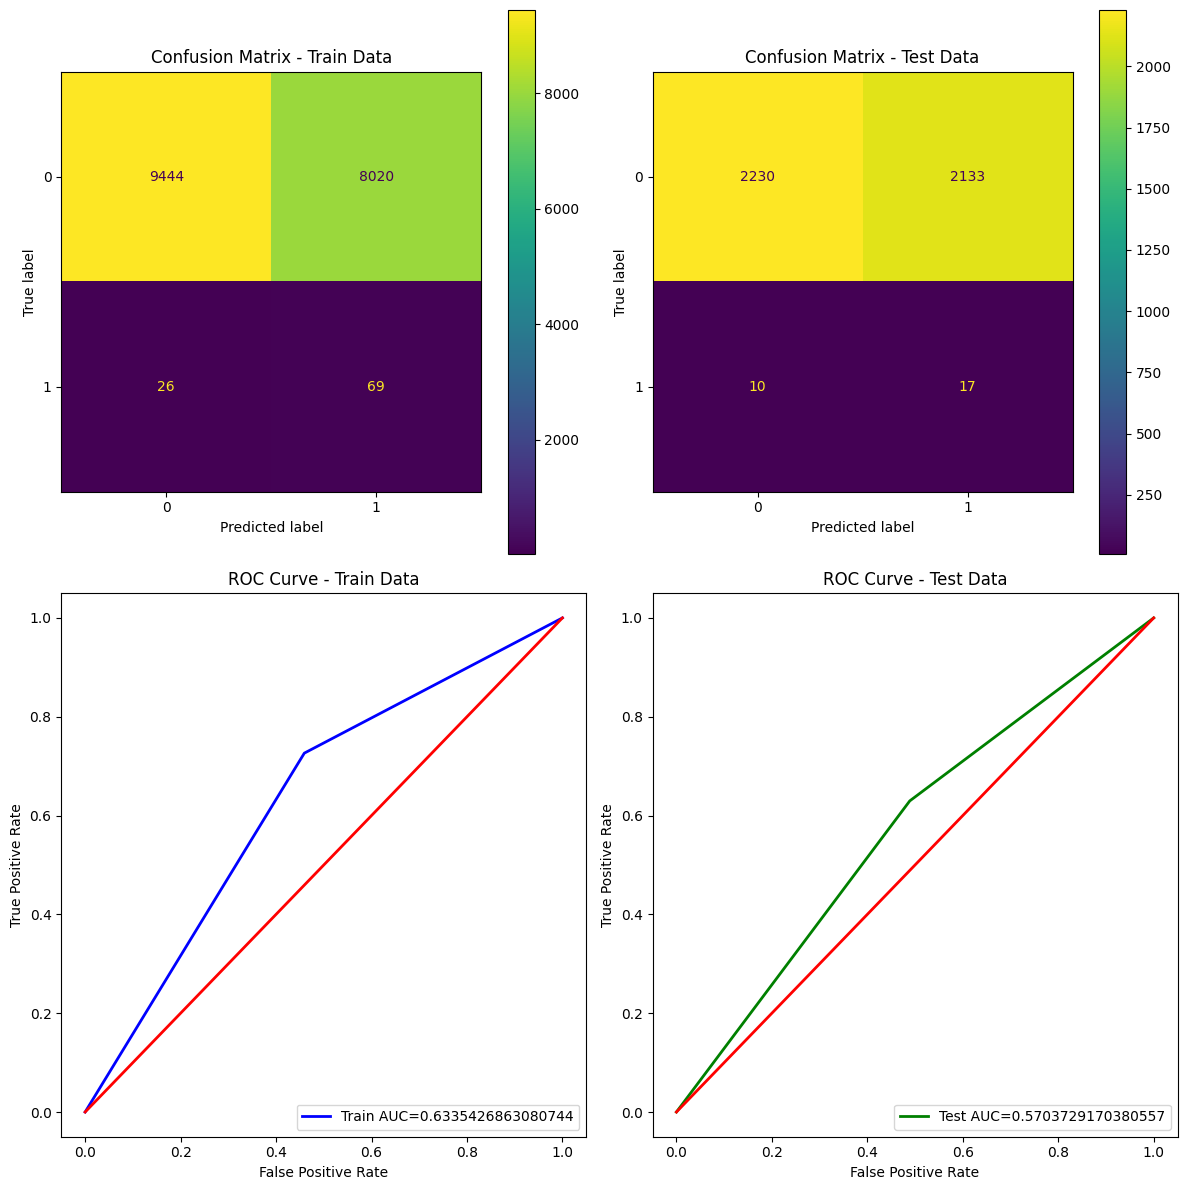

In [154]:
measure_performance(y_pred_train, y_train, y_pred_test, y_test)

In [155]:
df_final_res = df_final_res.append({"method":"Logistic regression with WOE - forward selection", 
                     "best_accuracy_train": balanced_accuracy_score(y_train, y_pred_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, y_pred_test)}, ignore_index=True)

### Random Forest Classifier

In [156]:
n_trials = 3

In [157]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import optuna

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score, accuracy_score, make_scorer
from imblearn.pipeline import Pipeline

In [158]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [159]:
def objective(trial):
    params = {
        'clf__n_estimators': trial.suggest_int('clf__n_estimators', 100, 2000),
        'clf__max_depth': trial.suggest_int('clf__max_depth', 3, 30),
        'clf__min_samples_split': trial.suggest_int('clf__min_samples_split', 2, 20),
        'clf__min_samples_leaf': trial.suggest_int('clf__min_samples_leaf', 1, 20),
        'clf__max_features': trial.suggest_categorical('clf__max_features', ['sqrt', 'log2', None]),
        'clf__class_weight': trial.suggest_categorical('clf__class_weight', ['balanced', 'balanced_subsample', None])
    }

    pipeline = Pipeline([
        ('clf', RandomForestClassifier(random_state=42))
    ])

    pipeline.set_params(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring=make_scorer(balanced_accuracy_score))

    return np.mean(scores)

In [160]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=n_trials)

[I 2024-06-04 18:44:10,481] A new study created in memory with name: no-name-57d9c8d1-5966-4228-b209-f227fa3d1122
[I 2024-06-04 18:44:35,748] Trial 0 finished with value: 0.4990552123720523 and parameters: {'clf__n_estimators': 533, 'clf__max_depth': 21, 'clf__min_samples_split': 14, 'clf__min_samples_leaf': 11, 'clf__max_features': 'log2', 'clf__class_weight': 'balanced'}. Best is trial 0 with value: 0.4990552123720523.
[I 2024-06-04 18:45:31,024] Trial 1 finished with value: 0.5 and parameters: {'clf__n_estimators': 1427, 'clf__max_depth': 7, 'clf__min_samples_split': 7, 'clf__min_samples_leaf': 20, 'clf__max_features': 'sqrt', 'clf__class_weight': None}. Best is trial 1 with value: 0.5.
[I 2024-06-04 18:46:03,387] Trial 2 finished with value: 0.5620419054267489 and parameters: {'clf__n_estimators': 712, 'clf__max_depth': 5, 'clf__min_samples_split': 8, 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__class_weight': 'balanced_subsample'}. Best is trial 2 with value: 0.5

In [161]:
best_params = study.best_params
print("Best parameters found:", best_params)

Best parameters found: {'clf__n_estimators': 712, 'clf__max_depth': 5, 'clf__min_samples_split': 8, 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__class_weight': 'balanced_subsample'}


In [162]:
best_RF = Pipeline([
        ('clf', RandomForestClassifier(random_state=42))
    ])
best_RF.set_params(**best_params)
best_RF.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5, min_samples_leaf=4,
                                        min_samples_split=8, n_estimators=712,
                                        random_state=42))])

In [163]:
RF_y_train = best_RF.predict(X_train)
RF_y_test = best_RF.predict(X_test)

Balanced accuracy on the train data:  0.7735594425826362
Balanced accuracy on the test data:  0.5851860340744136


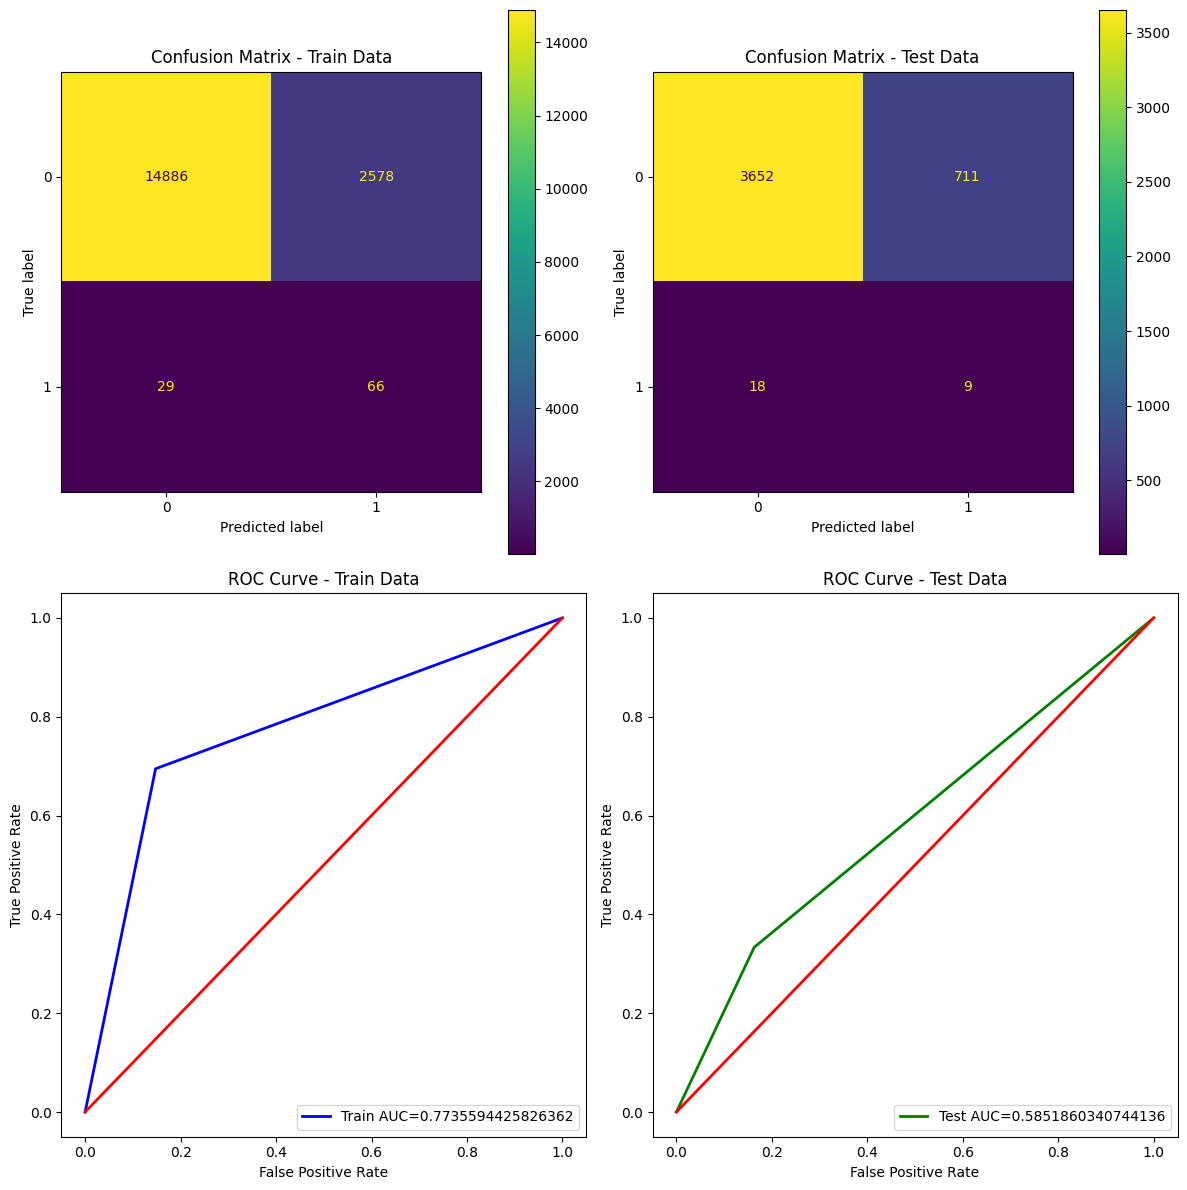

In [164]:
measure_performance(RF_y_train, y_train, RF_y_test, y_test)

In [165]:
df_final_res = df_final_res.append({"method":"Random Forest Classifier", 
                     "best_accuracy_train":balanced_accuracy_score(y_train, RF_y_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, RF_y_test)}, ignore_index=True)

### CatBoost

In [166]:
from catboost import CatBoostClassifier
import sklearn.metrics

In [167]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [169]:
param_dist = {
    'clf__depth': np.arange(3, 11),
    'clf__iterations': np.linspace(100, 2000, num=10, dtype=int),
    'clf__learning_rate': np.logspace(-2, -0.5, num=10),
    'clf__l2_leaf_reg': np.logspace(-5, 0, num=10),
    'clf__bagging_temperature': np.linspace(0, 1, num=10),
    'clf__random_strength': np.linspace(0, 1, num=10),
    'clf__scale_pos_weight': np.logspace(-1, 1, num=10),
    'clf__border_count': np.arange(1, 256, 25)
}

# Create the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('clf', CatBoostClassifier(
        eval_metric='BalancedAccuracy',
        verbose=0
    ))
])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=100,
    scoring=make_scorer(balanced_accuracy_score), 
    cv=skf, 
    verbose=1,
    random_state=42
)

In [170]:
# Fit the model
rs.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", rs.best_params_)
print("Best balanced accuracy score: ", rs.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Training has stopped (degenerate solution on iteration 229, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 683, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 480, probably too small l2-regularization, try to increase it)


Best parameters found:  {'clf__scale_pos_weight': 5.994842503189409, 'clf__random_strength': 0.7777777777777777, 'clf__learning_rate': 0.014677992676220698, 'clf__l2_leaf_reg': 0.0016681005372000592, 'clf__iterations': 1155, 'clf__depth': 3, 'clf__border_count': 1, 'clf__bagging_temperature': 0.5555555555555556}
Best balanced accuracy score:  0.5651707988404441


In [171]:
CB_y_train = rs.predict(X_train)
CB_y_test = rs.predict(X_test)

Balanced accuracy on the train data:  0.6677474865588158
Balanced accuracy on the test data:  0.5854152341660936


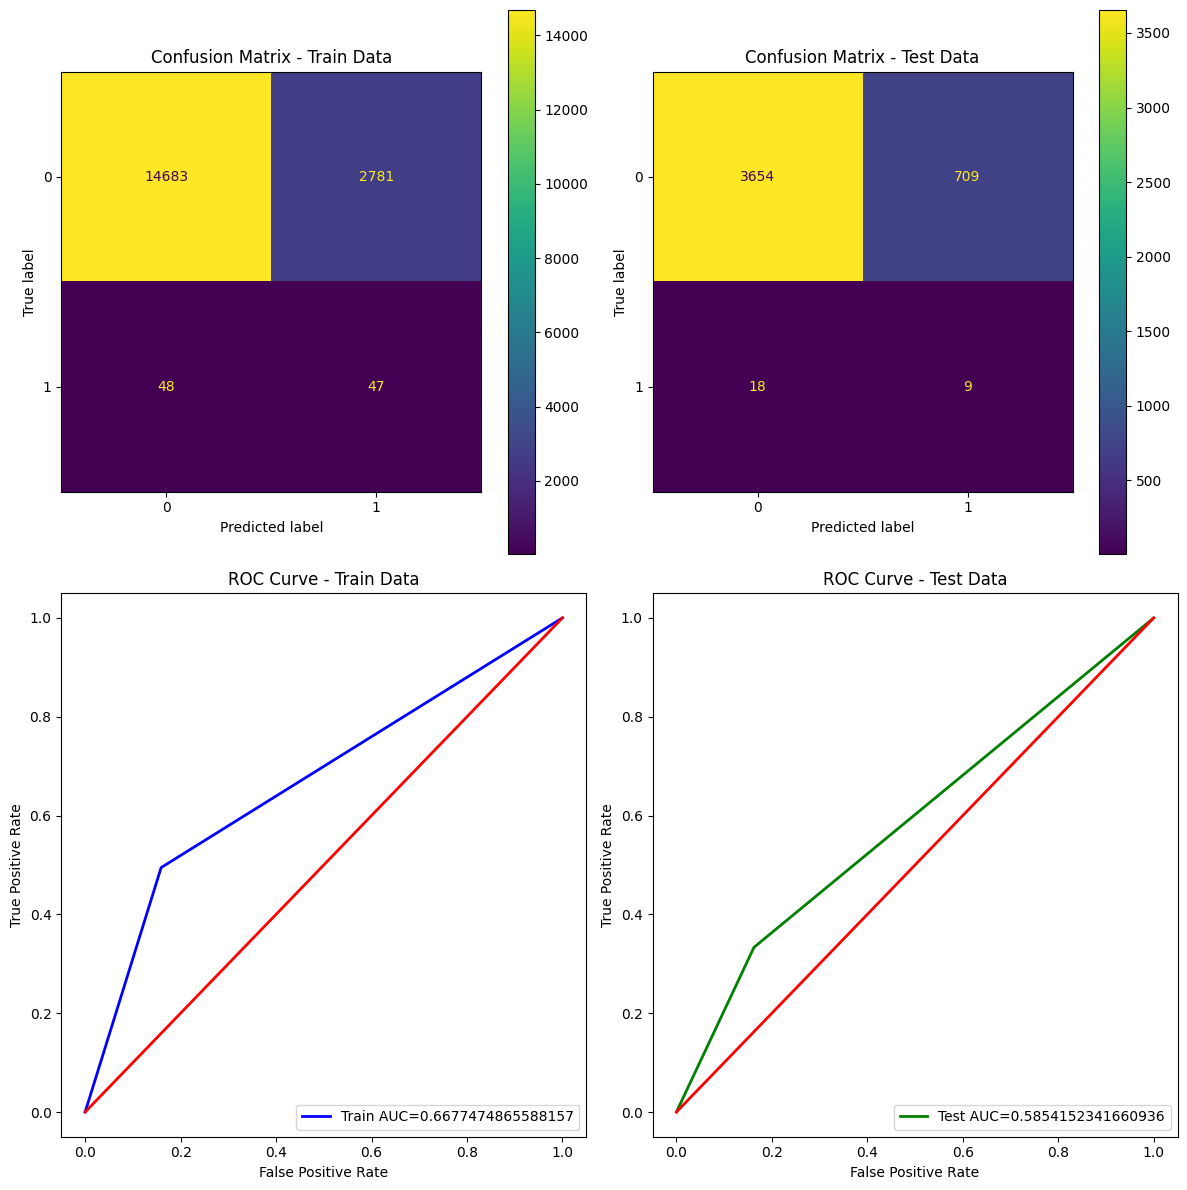

In [172]:
measure_performance(CB_y_train, y_train, CB_y_test, y_test)

In [173]:
df_final_res = df_final_res.append({"method":"CatBoost Classifier", 
                     "best_accuracy_train":balanced_accuracy_score(y_train, CB_y_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, CB_y_test)}, ignore_index=True)

### XGBoost 

In [174]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [175]:
oversampler = SMOTE()
undersampler = RandomUnderSampler()
clf = XGBClassifier(
            use_label_encoder=False,
            eval_metric='auc',
            random_state=42,)
            #objective="binary:logistic")

pipeline = Pipeline([('res1', oversampler), ('res2', undersampler), ('clf', clf)])

pipeline_param_dict = {
    'res1__sampling_strategy': [0.05, 0.1],
    'res2__sampling_strategy': [0.9, 0.95],

    'clf__learning_rate': [0.1, 0.3],
    'clf__n_estimators' : [100, 300],
    'clf__max_depth': [3, 6],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0],
    'clf__reg_alpha': [0, 0.1],
    'clf__reg_lambda': [0, 0.1],
    'clf__scale_pos_weight': [1, 10]
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gs = GridSearchCV(
    pipeline, 
    param_grid=pipeline_param_dict, 
    scoring=make_scorer(balanced_accuracy_score), 
    cv=skf, 
    verbose=1
)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('res1', SMOTE()),
                                       ('res2', RandomUnderSampler()),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_met...
             param_grid={'clf__colsample_bytree': [0.8, 1.0],
                         'clf__learning_rate': [0.1, 0.3],
                         'clf__max_depth': [3, 6],
                         'clf__n_estimators': [100, 300],
                         'clf__reg_alpha': [0, 0.1],
                         'clf__reg_lambda': [0, 0.1],
                         'clf__scale_pos_weight': [1, 10],
                         'clf__subsample': [0.8, 1.0],
                         'res1__sampling_strategy': [0.05, 0.1],
                         'res2__sampling_strategy': [0.9, 0.95]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=1)

In [176]:
pd.DataFrame(gs.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
536       0.107000      0.000817         0.014333        0.000471   
440       0.146667      0.001247         0.018000        0.000817   
616       0.244332      0.007542         0.019668        0.000473   
61        0.101999      0.000815         0.014332        0.000472   
120       0.230333      0.002056         0.019668        0.000472   

    param_clf__colsample_bytree param_clf__learning_rate param_clf__max_depth  \
536                         1.0                      0.1                    3   
440                         0.8                      0.3                    6   
616                         1.0                      0.1                    3   
61                          0.8                      0.1                    3   
120                         0.8                      0.1                    3   

    param_clf__n_estimators param_clf__reg_alpha param_clf__reg_lambda  ...  \
536                     100                    0                   0.1  ...   
440                     100                  0.1                   0.1  ...   
616                     300                  0.1                     0  ...   
61                      100                  0.1                   0.1  ...   
120                     300                  0.1                   0.1  ...   

    param_clf__subsample param_res1__sampling_strategy  \
536                  0.8                          0.05   
440                  0.8                          0.05   
616                  0.8                          0.05   
61                   1.0                          0.05   
120                  0.8                          0.05   

    param_res2__sampling_strategy  \
536                           0.9   
440                           0.9   
616                           0.9   
61                           0.95   
120                           0.9   

                                                params split0_test_score  \
536  {'clf__colsample_bytree': 1.0, 'clf__learning_...          0.614114   
440  {'clf__colsample_bytree': 0.8, 'clf__learning_...          0.547977   
616  {'clf__colsample_bytree': 1.0, 'clf__learning_...          0.525202   
61   {'clf__colsample_bytree': 0.8, 'clf__learning_...          0.571894   
120  {'clf__colsample_bytree': 0.8, 'clf__learning_...          0.544234   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
536           0.544193           0.586774         0.581694        0.028770   
440           0.600933           0.584277         0.577729        0.022109   
616           0.580903           0.615331         0.573812        0.037135   
61            0.576982           0.570883         0.573253        0.002669   
120           0.601338           0.566395         0.570656        0.023507   

     rank_test_score  
536                1  
440                2  
616                3  
61                 4  
120                5  

[5 rows x 21 columns]

In [177]:
print("Best parameters found: ", gs.best_params_)

Best parameters found:  {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__reg_alpha': 0, 'clf__reg_lambda': 0.1, 'clf__scale_pos_weight': 10, 'clf__subsample': 0.8, 'res1__sampling_strategy': 0.05, 'res2__sampling_strategy': 0.9}


In [178]:
best_XGB=gs.best_estimator_['clf']

XGB_y_train = best_XGB.predict(X_train)
XGB_y_test = best_XGB.predict(X_test)

Balanced accuracy on the train data:  0.7115973913253129
Balanced accuracy on the test data:  0.5792183427984483


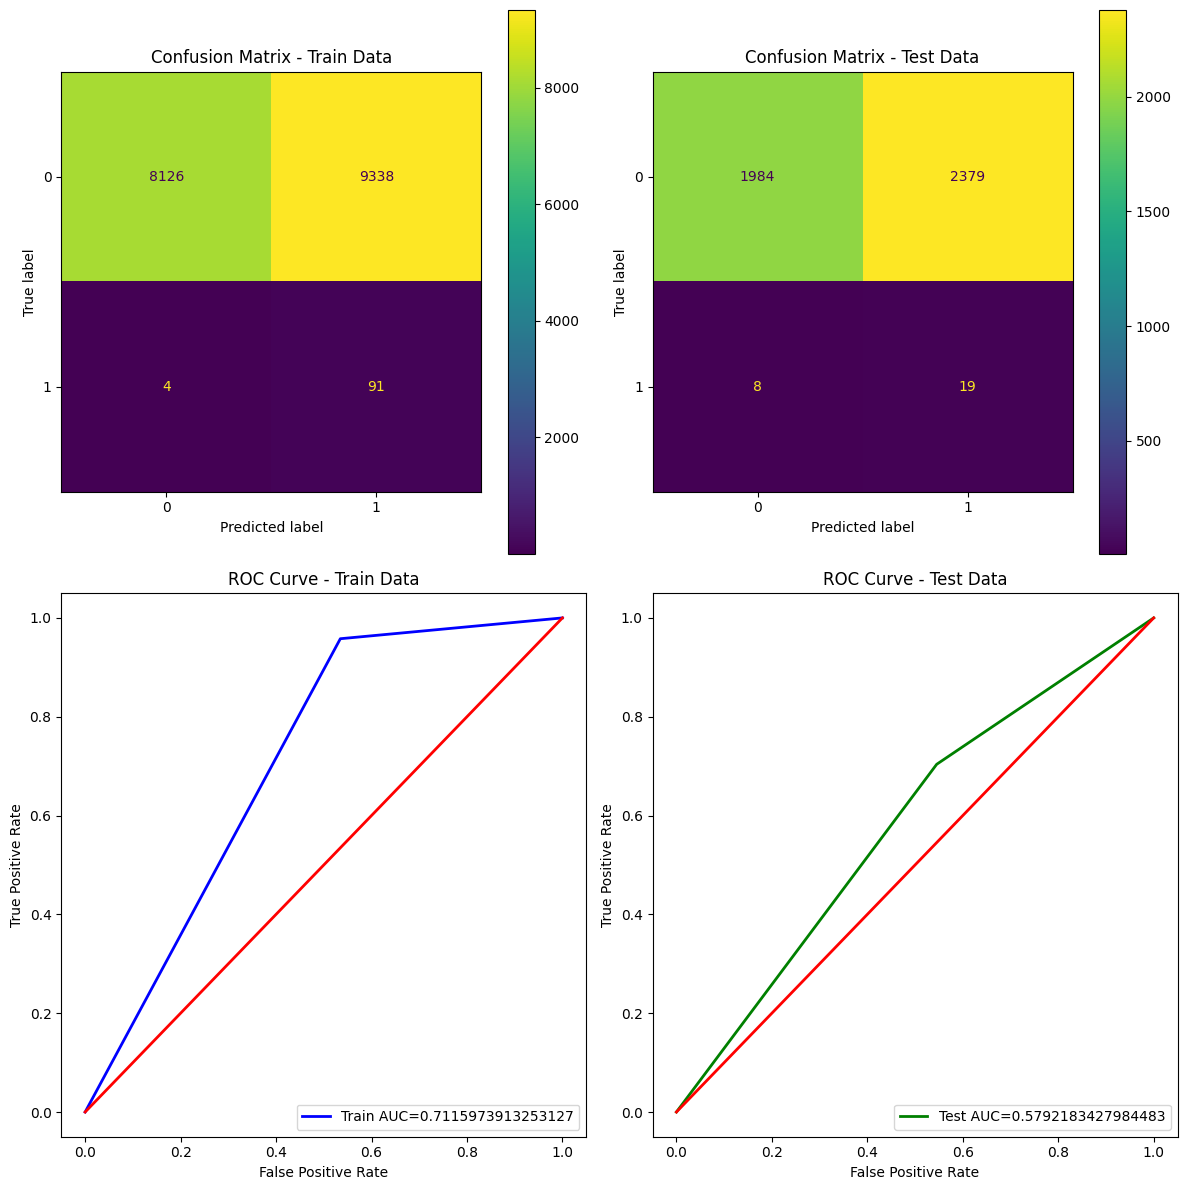

In [179]:
measure_performance(XGB_y_train, y_train, XGB_y_test, y_test)

In [180]:
#clf.get_score(importance_type='gain')

In [181]:
df_final_res = df_final_res.append({"method":"XGBoost Classifier", 
                     "best_accuracy_train":balanced_accuracy_score(y_train, XGB_y_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, XGB_y_test)}, ignore_index=True)

### Voting classifier

In [182]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [183]:
voting_clf = VotingClassifier(
        estimators=[
            ('rf', best_RF),
            ('catboost', rs),
            ('xgb', best_XGB)
        ],
        voting='hard'
    )

voting_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Training has stopped (degenerate solution on iteration 229, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 683, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 480, probably too small l2-regularization, try to increase it)


VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('clf',
                                               RandomForestClassifier(class_weight='balanced_subsample',
                                                                      max_depth=5,
                                                                      min_samples_leaf=4,
                                                                      min_samples_split=8,
                                                                      n_estimators=712,
                                                                      random_state=42))])),
                             ('catboost',
                              RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                                 estimator=Pipeline(steps=[('smote',
                                                                            SMOTE(random_state=4...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [184]:
voting_pred_train = voting_clf.predict(X_train)
voting_pred_test = voting_clf.predict(X_test)

Balanced accuracy on the train data:  0.691181558454083
Balanced accuracy on the test data:  0.566531693279344


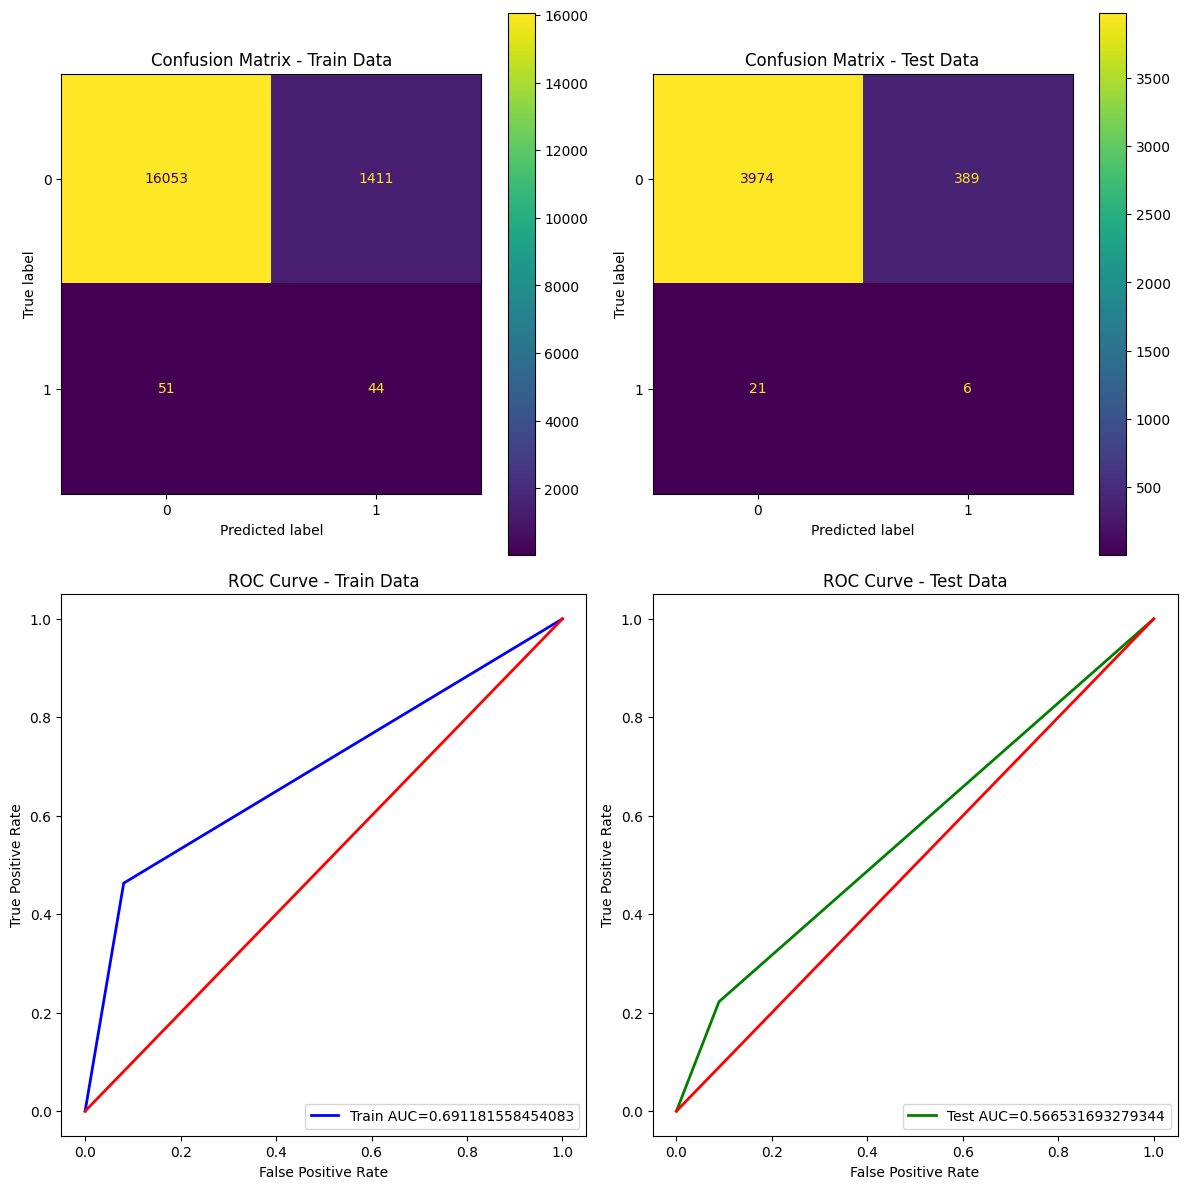

In [185]:
measure_performance(voting_pred_train, y_train, voting_pred_test, y_test)

In [186]:
df_final_res = df_final_res.append({"method":"Voting Classifier", 
                     "best_accuracy_train":balanced_accuracy_score(y_train, voting_pred_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, voting_pred_test)}, ignore_index=True)

### Outlier detection approach

In [187]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.hbos import HBOS
from pyod.models.sos import SOS
from pyod.models.ecod import ECOD

import timeit

In [188]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [189]:
result_df = pd.DataFrame({"Package Name":[],"Model Name":[],"Time Taken in Seconds":[],"No.Of Data Points":[],"No.Of Outliers":[],"Percentage":[]})
package_name = "PyOD"
result_noniqr = pd.DataFrame({"Package Name":[],"Model Name":[],"Outliers Predicted":[],"Non-Outliers Predicted":[]})

outlier_df = pd.DataFrame()
n_points = X.shape[0]

C:\Users\PocsG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\PocsG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\PocsG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


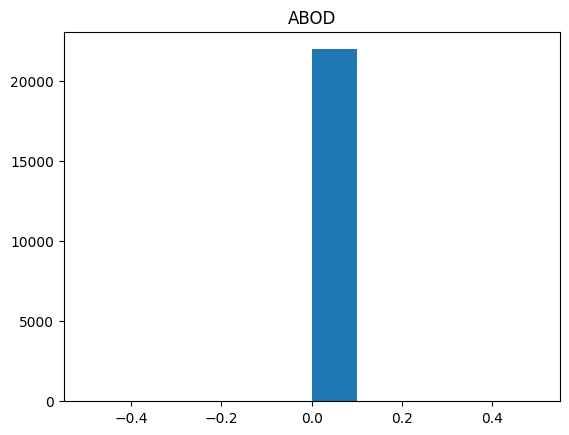

In [190]:
clf_name = "ABOD"
clf = ABOD(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()


diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

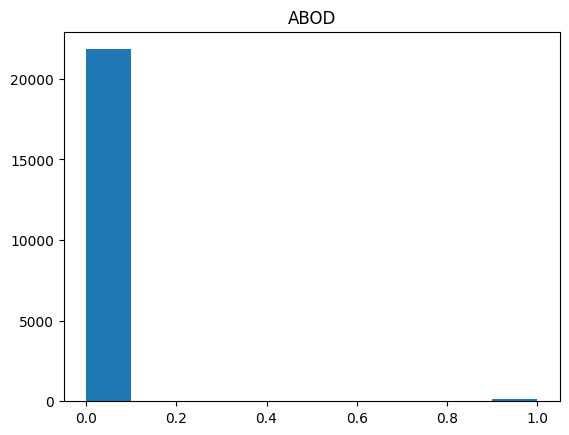

In [191]:
clf = KNN(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

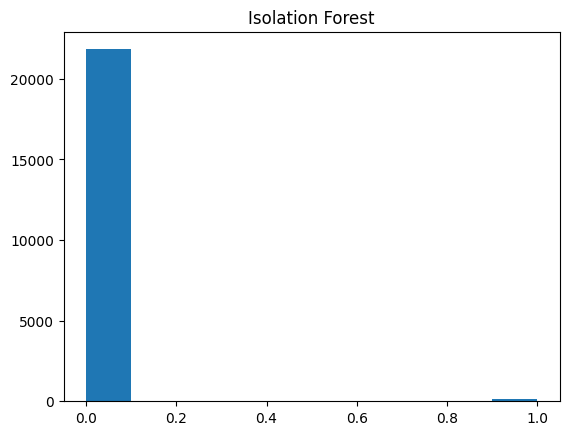

In [192]:
clf_name = "Isolation Forest"
clf = IForest(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

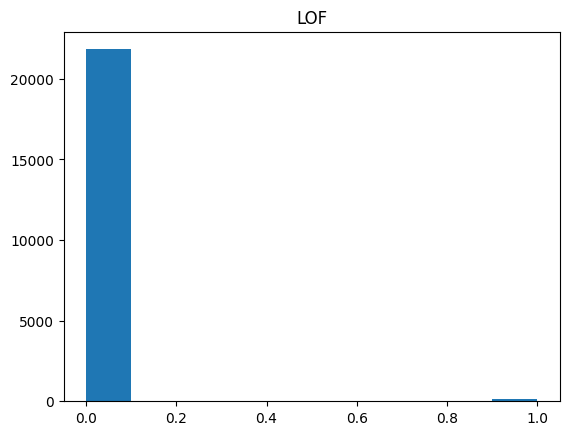

In [193]:
clf_name = "LOF"
clf = LOF(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

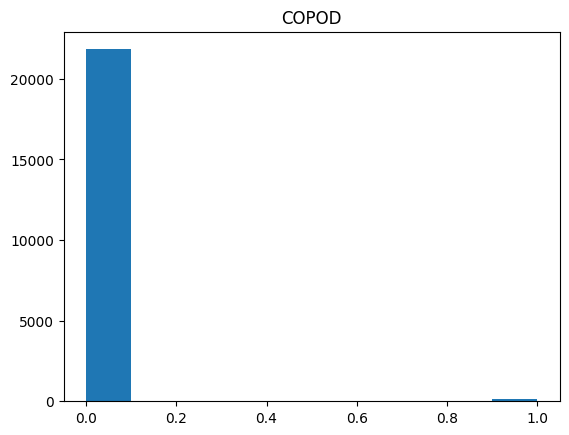

In [194]:
clf_name = "COPOD"
clf = COPOD(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

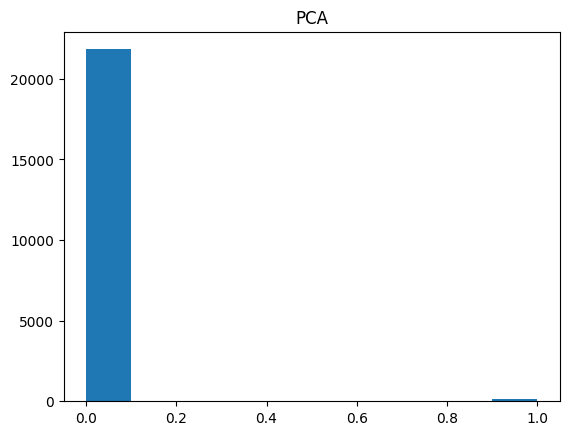

In [195]:
clf_name = "PCA"
clf = PCA(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

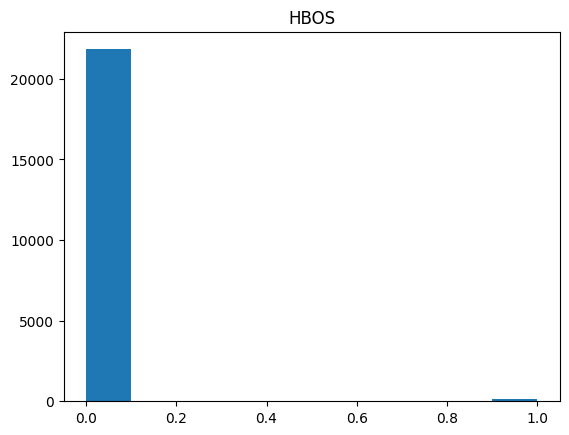

In [196]:
clf_name = "HBOS"
clf = HBOS(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

#makeDataFrameNonIQR(clf_name, clf.labels_)

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

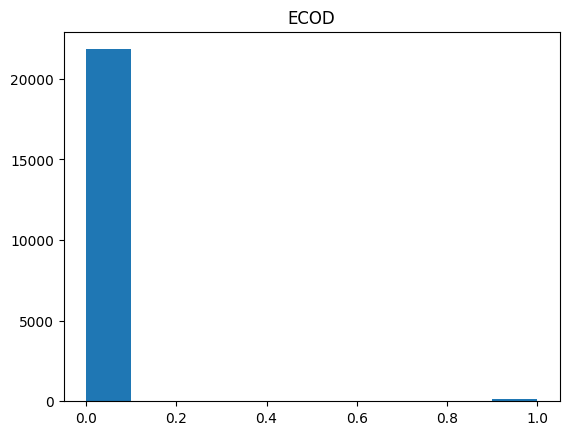

In [197]:
clf_name = "ECOD"
clf = ECOD(contamination=outlier_percent)

#for clf_name, clf in model_dict.items():
# Starting Timer
start_time = timeit.default_timer()
clf.fit(X)
y_decision_scores = clf.decision_scores_
# Stopping Timer
stop_time = timeit.default_timer()

diff = np.round(stop_time - start_time, 2)
labels = clf.labels_
n_outliers = np.count_nonzero(labels)
predicted_outlier_percent = np.round((n_outliers / n_points) * 100, 0)

fig = plt.figure()
plt.title(clf_name)
plt.hist(labels)
plt.show()

outlier_df[clf_name + " Outliers"] = labels
outlier_df[clf_name + " Distance"] = np.round(y_decision_scores, 2)

cur_model = {"Package Name": package_name, "Model Name": clf_name, "Time Taken in Seconds": diff,
             "No.Of Data Points": n_points, "No.Of Outliers": n_outliers, "Percentage": predicted_outlier_percent}
result_df = pd.concat([result_df, pd.DataFrame(cur_model.values()).T.rename(columns={0: "Package Name", 1:"Model Name", 2:"Time Taken in Seconds", 3:"No.Of Data Points", 4:"No.Of Outliers", 5:"Percentage"})], ignore_index=True)

In [198]:
result_df

Package Name        Model Name Time Taken in Seconds No.Of Data Points  \
0         PyOD              ABOD                  7.83             21949   
1         PyOD              ABOD                   1.6             21949   
2         PyOD  Isolation Forest                  0.55             21949   
3         PyOD               LOF                  1.57             21949   
4         PyOD             COPOD                  0.34             21949   
5         PyOD               PCA                  0.09             21949   
6         PyOD              HBOS                   4.5             21949   
7         PyOD              ECOD                   0.1             21949   

  No.Of Outliers Percentage  
0              0        0.0  
1            122        1.0  
2            122        1.0  
3            122        1.0  
4            121        1.0  
5            122        1.0  
6            121        1.0  
7            122        1.0

In [199]:
from matplotlib.patches import Polygon

outlier_flag_col = []
for i in outlier_df.columns:
    if "Outliers" in i:
        outlier_flag_col.append(i)

print(outlier_flag_col)

['ABOD Outliers', 'Isolation Forest Outliers', 'LOF Outliers', 'COPOD Outliers', 'PCA Outliers', 'HBOS Outliers', 'ECOD Outliers']


In [200]:
exp_outlier_nr = X.shape[0]*outlier_percent
exp_outlier_nr

122.0

In [201]:
outlier_df["nr_of_match"] = outlier_df[outlier_flag_col].sum(axis=1)
outlier_df["nr_of_match"].max()

outlier_df_filt = outlier_df[outlier_df["nr_of_match"]>0]
outlier_df_filt.shape

(333, 15)

In [202]:
res = pd.DataFrame(y)
res["pred"]= np.where(res.index.isin(outlier_df_filt.index), 1, 0)

In [203]:
y_train_pred = res[res.index.isin(X_train.index)]["pred"]
y_test_pred = res[res.index.isin(X_test.index)]["pred"]

Balanced accuracy on the train data:  0.4978765339826892
Balanced accuracy on the test data:  0.4915195966078386


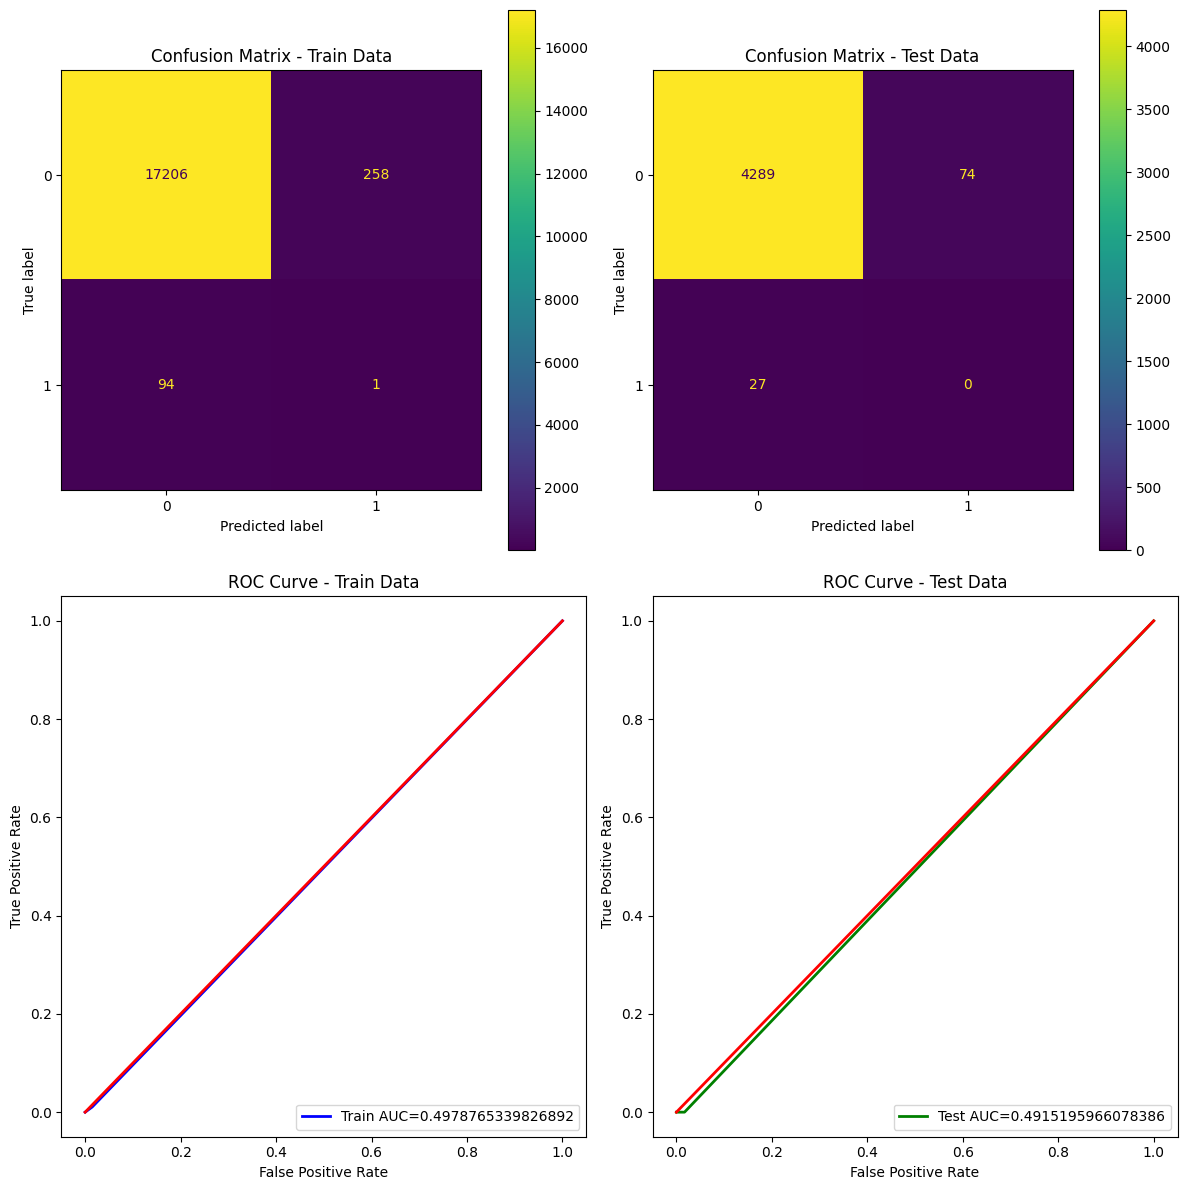

In [204]:
measure_performance(y_train_pred, y_train, y_test_pred, y_test)

In [205]:
for i in outlier_flag_col:
    res2 = pd.DataFrame(y)
    res["pred"]= outlier_df[i]
    print('Balanced accuracy on the {} data of the best model: '.format(i.split()[0]), balanced_accuracy_score(res["DEFAULT_FLAG"], res["pred"]))

Balanced accuracy on the ABOD data of the best model:  0.5054478323207758
Balanced accuracy on the Isolation data of the best model:  0.49720529619278875
Balanced accuracy on the LOF data of the best model:  0.5054478323207758
Balanced accuracy on the COPOD data of the best model:  0.4972282036010446
Balanced accuracy on the PCA data of the best model:  0.49720529619278875
Balanced accuracy on the HBOS data of the best model:  0.4972282036010446
Balanced accuracy on the ECOD data of the best model:  0.49720529619278875


In [206]:
df_final_res = df_final_res.append({"method":"Outlier detection methods", 
                     "best_accuracy_train": balanced_accuracy_score(y_train, y_train_pred),
                     "best_accuracy_test":balanced_accuracy_score(y_test, y_test_pred)}, ignore_index=True)


### Neural network

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, elu, gelu
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [208]:
X_train, X_test = X_train_final.copy(), X_test_final.copy()

In [209]:
y_train_NN = np.array(y_train)
y_test_NN = np.array(y_test)

In [210]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [211]:
# Define the model
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation="gelu", kernel_regularizer=l2(0.0001)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.1))

nn_model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.0001)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.1))

nn_model.add(Dense(32, activation="gelu", kernel_regularizer=l2(0.0001)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.1))

nn_model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.0001)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.1))

nn_model.add(Dense(16, activation="gelu", kernel_regularizer=l2(0.0001)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.1))

nn_model.add(Dense(1, activation="sigmoid"))

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Fit the model
history = nn_model.fit(X_train, y_train_NN, 
                       epochs=50, 
                       batch_size=32, 
                       validation_split=0.2, 
                       class_weight=class_weight_dict, 
                       callbacks=[early_stopping, reduce_lr])


C:\Users\PocsG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5442 - loss: 0.8213 - val_accuracy: 0.4300 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5844 - loss: 0.6993 - val_accuracy: 0.5888 - val_loss: 0.7030 - learning_rate: 0.0010
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6162 - loss: 0.6635 - val_accuracy: 0.6264 - val_loss: 0.6790 - learning_rate: 0.0010
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5687 - loss: 0.7095 - val_accuracy: 0.5923 - val_loss: 0.6725 - learning_rate: 0.0010
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5930 - loss: 0.6592 - val_accuracy: 0.8158 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6356 - loss: 0.7330 - val_accuracy: 0.7147 - val_loss: 0.5954 - learning_rate: 0.0010
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6353 - loss: 0.6671 - 

In [212]:
nn_model_prediction_train = nn_model.predict(X_train)
nn_model_prediction_test = nn_model.predict(X_test)
nn_model_classes_train = (nn_model_prediction_train > 0.5).astype(int).reshape(-1)
nn_model_classes_test = (nn_model_prediction_test > 0.5).astype(int).reshape(-1)

549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Balanced accuracy on the train data:  0.6463796200303783
Balanced accuracy on the test data:  0.6083097766572441


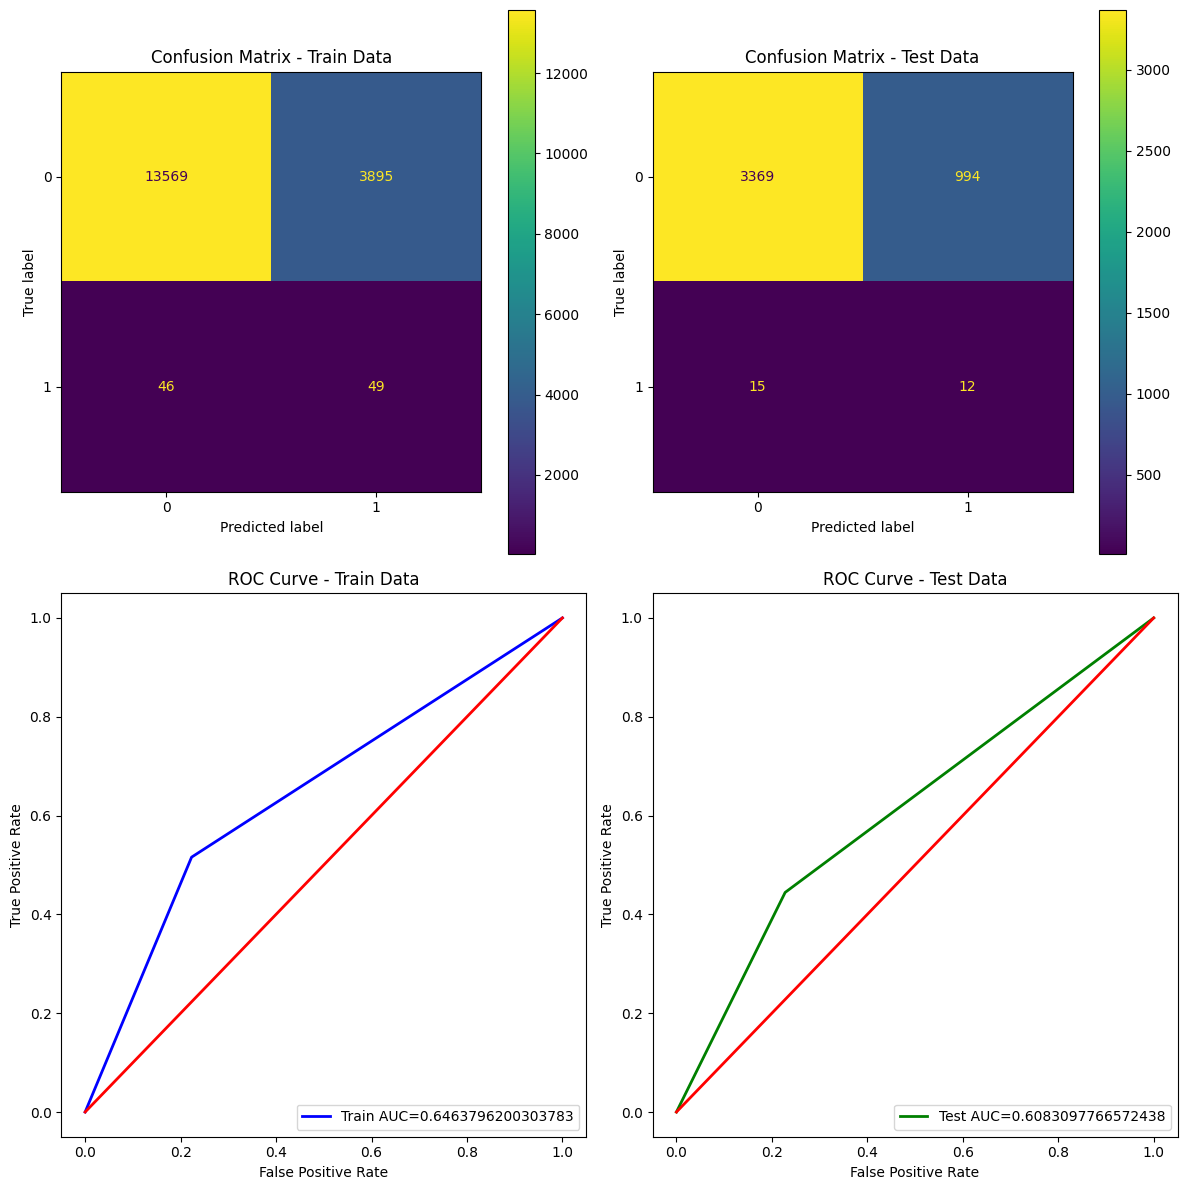

In [213]:
measure_performance(nn_model_classes_train, y_train, nn_model_classes_test, y_test)

In [214]:
df_final_res = df_final_res.append({"method":"Neural Network", 
                     "best_accuracy_train": balanced_accuracy_score(y_train, nn_model_classes_train),
                     "best_accuracy_test":balanced_accuracy_score(y_test, nn_model_classes_test)}, ignore_index=True)